## Personal Activity Tracking Data Analysis
### by Ivaylo Pavlov (22/10/2016)
##### Data from iPhone (25/09/2015 - 11/03/2016) & Garmin Vivosmart HR (11/03/2016 - Present) exported using QS Access App

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib.patches as mpatches, warnings, seaborn as sns, scipy.stats as ss, matplotlib.mlab as mlab
warnings.filterwarnings('ignore')

%pylab inline
plt.rc("savefig", dpi=200)
matplotlib.style.use('ggplot')

pd.set_option('display.max_colwidth',80)

Populating the interactive namespace from numpy and matplotlib


#### Import and clean the daily data and transform the heart rate intraday data for use

In [2]:
#Import the CSV files with the daily and intraday data
raw_daily_data = pd.read_csv("Health Data-daily.csv")
raw_intraday = pd.read_csv('Health Data-intraday.csv')

#Extract only the heart rate from the intraday data and the delete the rest, add a day only column
raw_intraday_data = raw_intraday.copy()
raw_intraday_data.index = raw_intraday_data['Start']
raw_intraday_data = raw_intraday_data.ix[:,'Heart Rate (count/min)']
raw_intraday_data = pd.DataFrame(raw_intraday_data)
raw_intraday_data.index = pd.to_datetime(raw_intraday_data.index)
raw_intraday_data = raw_intraday_data.ix[raw_intraday_data.index>'11-Mar-2016 18:00']
raw_intraday_data = raw_intraday_data.replace(0, np.nan)
raw_intraday_data = raw_intraday_data.dropna(axis=0)
raw_intraday_data['Date'] = raw_intraday_data.index.date
hr_intraday = raw_intraday_data

#Extract only the steps from the intraday data and the delete the rest, add a day only column
raw_intraday_data2 = raw_intraday.copy()
raw_intraday_data2 = raw_intraday_data2.ix[:,('Start','Finish','Steps (count)')]
raw_intraday_data2 = pd.DataFrame(raw_intraday_data2)
raw_intraday_data2.index = pd.to_datetime(raw_intraday_data2['Start'])
#raw_intraday_data2 = raw_intraday_data2.ix[raw_intraday_data2.index>'11-Mar-2016 18:00']
raw_intraday_data2 = raw_intraday_data2.replace(0, np.nan)
raw_intraday_data2 = raw_intraday_data2.dropna(axis=0)
raw_intraday_data2['Date'] = raw_intraday_data2.index.date
raw_intraday_data2['Hour'] = raw_intraday_data2.index.time
raw_intraday_data2['Weekday'] = pd.DatetimeIndex(raw_intraday_data2['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data2['Weekday'] = raw_intraday_data2['Weekday'].apply(lambda x: days[x])
steps_intraday = raw_intraday_data2

#Extract only the steps from the intraday data and the delete the rest, add a day only column
raw_intraday_data3 = raw_intraday.copy()
raw_intraday_data3 = raw_intraday_data3.ix[:,('Start','Finish','Heart Rate (count/min)')]
raw_intraday_data3 = pd.DataFrame(raw_intraday_data3)
raw_intraday_data3.index = pd.to_datetime(raw_intraday_data3['Start'])
raw_intraday_data3 = raw_intraday_data3.ix[raw_intraday_data3.index>'11-Mar-2016 18:00']
raw_intraday_data3 = raw_intraday_data3.replace(0, np.nan)
raw_intraday_data3 = raw_intraday_data3.dropna(axis=0)
raw_intraday_data3['Date'] = raw_intraday_data3.index.date
raw_intraday_data3['Hour'] = raw_intraday_data3.index.time
raw_intraday_data3['Weekday'] = pd.DatetimeIndex(raw_intraday_data3['Date']).dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
raw_intraday_data3['Weekday'] = raw_intraday_data3['Weekday'].apply(lambda x: days[x])
hr_intraday2 = raw_intraday_data3

#### Delete all the zero columns, set table index and delete the useless columns and add Total Calories and Weekday columns to DataSet

In [3]:
data = raw_daily_data.ix[:, (raw_daily_data != 0).any(axis=0)]
data = data.set_index(pd.DatetimeIndex(data['Start']))
data = data.drop(['Start','Finish'],axis=1)

data['Total Calories (kcal)'] = data['Active Calories (kcal)'] + data['Resting Calories (kcal)']
data['Weekday'] = data.index.dayofweek
days = {0:'0 Mon',1:'1 Tue',2:'2 Weds',3:'3 Thurs',4:'4 Fri',5:'5 Sat',6:'6 Sun'}
data['Weekday'] = data['Weekday'].apply(lambda x: days[x])

In [4]:
#Get table stats - rows and columns
print "ROWS OF DATA / DAILY: " + str(raw_daily_data.shape[0]) + " / INTRADAY: " + str(hr_intraday.shape[0])
print ""
data.tail(7)

ROWS OF DATA / DAILY: 424 / INTRADAY: 3657



Active Calories (kcal)  Body Fat Percentage (%)  \
2016-11-15                     0.0                    0.127   
2016-11-16                     0.0                    0.000   
2016-11-17                     0.0                    0.128   
2016-11-18                     0.0                    0.000   
2016-11-19                     0.0                    0.000   
2016-11-20                     0.0                    0.000   
2016-11-21                     0.0                    0.000   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-11-15                     18.5          0.000                      0.0   
2016-11-16                      0.0          0.000                      0.0   
2016-11-17                     18.5          0.000                      0.0   
2016-11-18                      0.0          0.000                      0.0   
2016-11-19                      0.0          0.000                      0.0   
2016-11-20                      0.0          0.000                      0.0   
2016-11-21                      0.0          4.972                      0.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-11-15                   141.0            49.944329   
2016-11-16                   151.0             0.000000   
2016-11-17                   138.0            50.380000   
2016-11-18                   132.0             0.000000   
2016-11-19                   142.0             0.000000   
2016-11-20                   141.0             0.000000   
2016-11-21                   151.0             0.000000   

            Resting Calories (kcal)  Steps (count)  Weight (kg)  \
2016-11-15                      0.0         5299.0    57.209999   
2016-11-16                      0.0        10052.0     0.000000   
2016-11-17                      0.0         5439.0    57.250000   
2016-11-18                      0.0         5368.0     0.000000   
2016-11-19                      0.0         9113.0     0.000000   
2016-11-20                      0.0         1145.0     0.000000   
2016-11-21                      0.0            0.0     0.000000   

            Total Calories (kcal)  Weekday  
2016-11-15                    0.0    1 Tue  
2016-11-16                    0.0   2 Weds  
2016-11-17                    0.0  3 Thurs  
2016-11-18                    0.0    4 Fri  
2016-11-19                    0.0    5 Sat  
2016-11-20                    0.0    6 Sun  
2016-11-21                    0.0    0 Mon

#### Clean up WEIGHT data, Fill previous values for the Weight-related data and remove starting NA rows (Weight, BMI, Body Fat %, Lean Body Mass)

In [5]:
data.ix[:,'Body Fat Percentage (%)'] *= 100 #Scale Body Fat Percentage (%) by 100
data.ix[:,'Weight (kg)'] = data.ix[:,'Weight (kg)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Fat Percentage (%)'] = data.ix[:,'Body Fat Percentage (%)'].replace(to_replace=0, method='ffill')
data.ix[:,'Body Mass Index (count)'] = data.ix[:,'Body Mass Index (count)'].replace(to_replace=0, method='ffill')
data.ix[:,'Lean Body Mass (kg)'] = data.ix[:,'Lean Body Mass (kg)'].replace(to_replace=0, method='ffill')
data_for_weight = data[np.isfinite(data['Weight (kg)'])]
data_for_weight = data_for_weight.ix[:,['Weight (kg)','Lean Body Mass (kg)','Body Fat Percentage (%)','Body Mass Index (count)']]
data_for_weight = data_for_weight.ix[data_for_weight.index>'2016-03-28']
print "Rows remaining with Weight data: " + str(len(data_for_weight))

Rows remaining with Weight data: 238


#### Clean up STEPS, FLIGHTS CLIMBED, DISTANCE data, Setting all days with less than 550 steps or less than 0.400 km as NaN (haven't worn the tracker or battery died)

In [6]:
print "Rows before clean up: " + str(len(data))
data_for_steps = data
data_for_steps.ix[data_for_steps.ix[:,'Steps (count)']<550,'Steps (count)'] = np.nan
data_for_steps.ix[data_for_steps.ix[:,'Distance (km)']<0.400,'Distance (km)'] = np.nan
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Steps (count)'])]
data_for_steps = data_for_steps[np.isfinite(data_for_steps['Distance (km)'])]
print "Rows lost after clean up: " + " " + str(len(data)-len(data_for_steps.index))
print "Rows after clean up: " + " " + str(len(data_for_steps.index))
data_for_steps.tail()

Rows before clean up: 424
Rows lost after clean up:  79
Rows after clean up:  345


Active Calories (kcal)  Body Fat Percentage (%)  \
2016-10-20                  1662.0                     12.3   
2016-10-21                     0.0                     12.3   
2016-10-22                     0.0                     12.3   
2016-10-23                     0.0                     12.3   
2016-10-30                     0.0                     11.4   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-10-20                     17.6          9.740                     28.0   
2016-10-21                     17.6          4.490                     13.0   
2016-10-22                     17.6          4.280                      4.0   
2016-10-23                     17.6          3.280                      3.0   
2016-10-30                     18.0          5.551                      0.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-10-20                   166.0            47.761419   
2016-10-21                   143.0            47.761419   
2016-10-22                   141.0            47.761419   
2016-10-23                   168.0            47.761419   
2016-10-30                   147.0            49.491961   

            Resting Calories (kcal)  Steps (count)  Weight (kg)  \
2016-10-20                   1848.0        12187.0    54.459999   
2016-10-21                      0.0         5541.0    54.459999   
2016-10-22                      0.0         5280.0    54.459999   
2016-10-23                      0.0         3907.0    54.459999   
2016-10-30                      0.0         6932.0    55.860001   

            Total Calories (kcal)  Weekday  
2016-10-20                 3510.0  3 Thurs  
2016-10-21                    0.0    4 Fri  
2016-10-22                    0.0    5 Sat  
2016-10-23                    0.0    6 Sun  
2016-10-30                    0.0    6 Sun

#### Clean up CALORIES, WEEKDAY, HEART RATE (daily) data

In [7]:
data_for_cal = data
data_for_cal.ix[data_for_cal.ix[:,'Total Calories (kcal)']<0.1,['Total Calories (kcal)','Active Calories (kcal)','Resting Calories (kcal)']] = np.nan
data_for_cal = data[np.isfinite(data['Total Calories (kcal)'])]
data_for_cal = data_for_cal.ix[data_for_cal.index>'2016-03-11']
data_for_cal2 = data_for_cal.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)','Distance (km)','Flights Climbed (count)','Steps (count)','Weekday','Total Calories (kcal)','Heart Rate (count/min)'],axis=1)

data_for_weekday = data.drop(['Body Fat Percentage (%)','Body Mass Index (count)','Lean Body Mass (kg)','Weight (kg)'],axis=1)

data_for_hr = data[["Heart Rate (count/min)","Weekday"]].copy()
data_for_hr = data_for_hr.ix[data_for_hr["Heart Rate (count/min)"]>0]

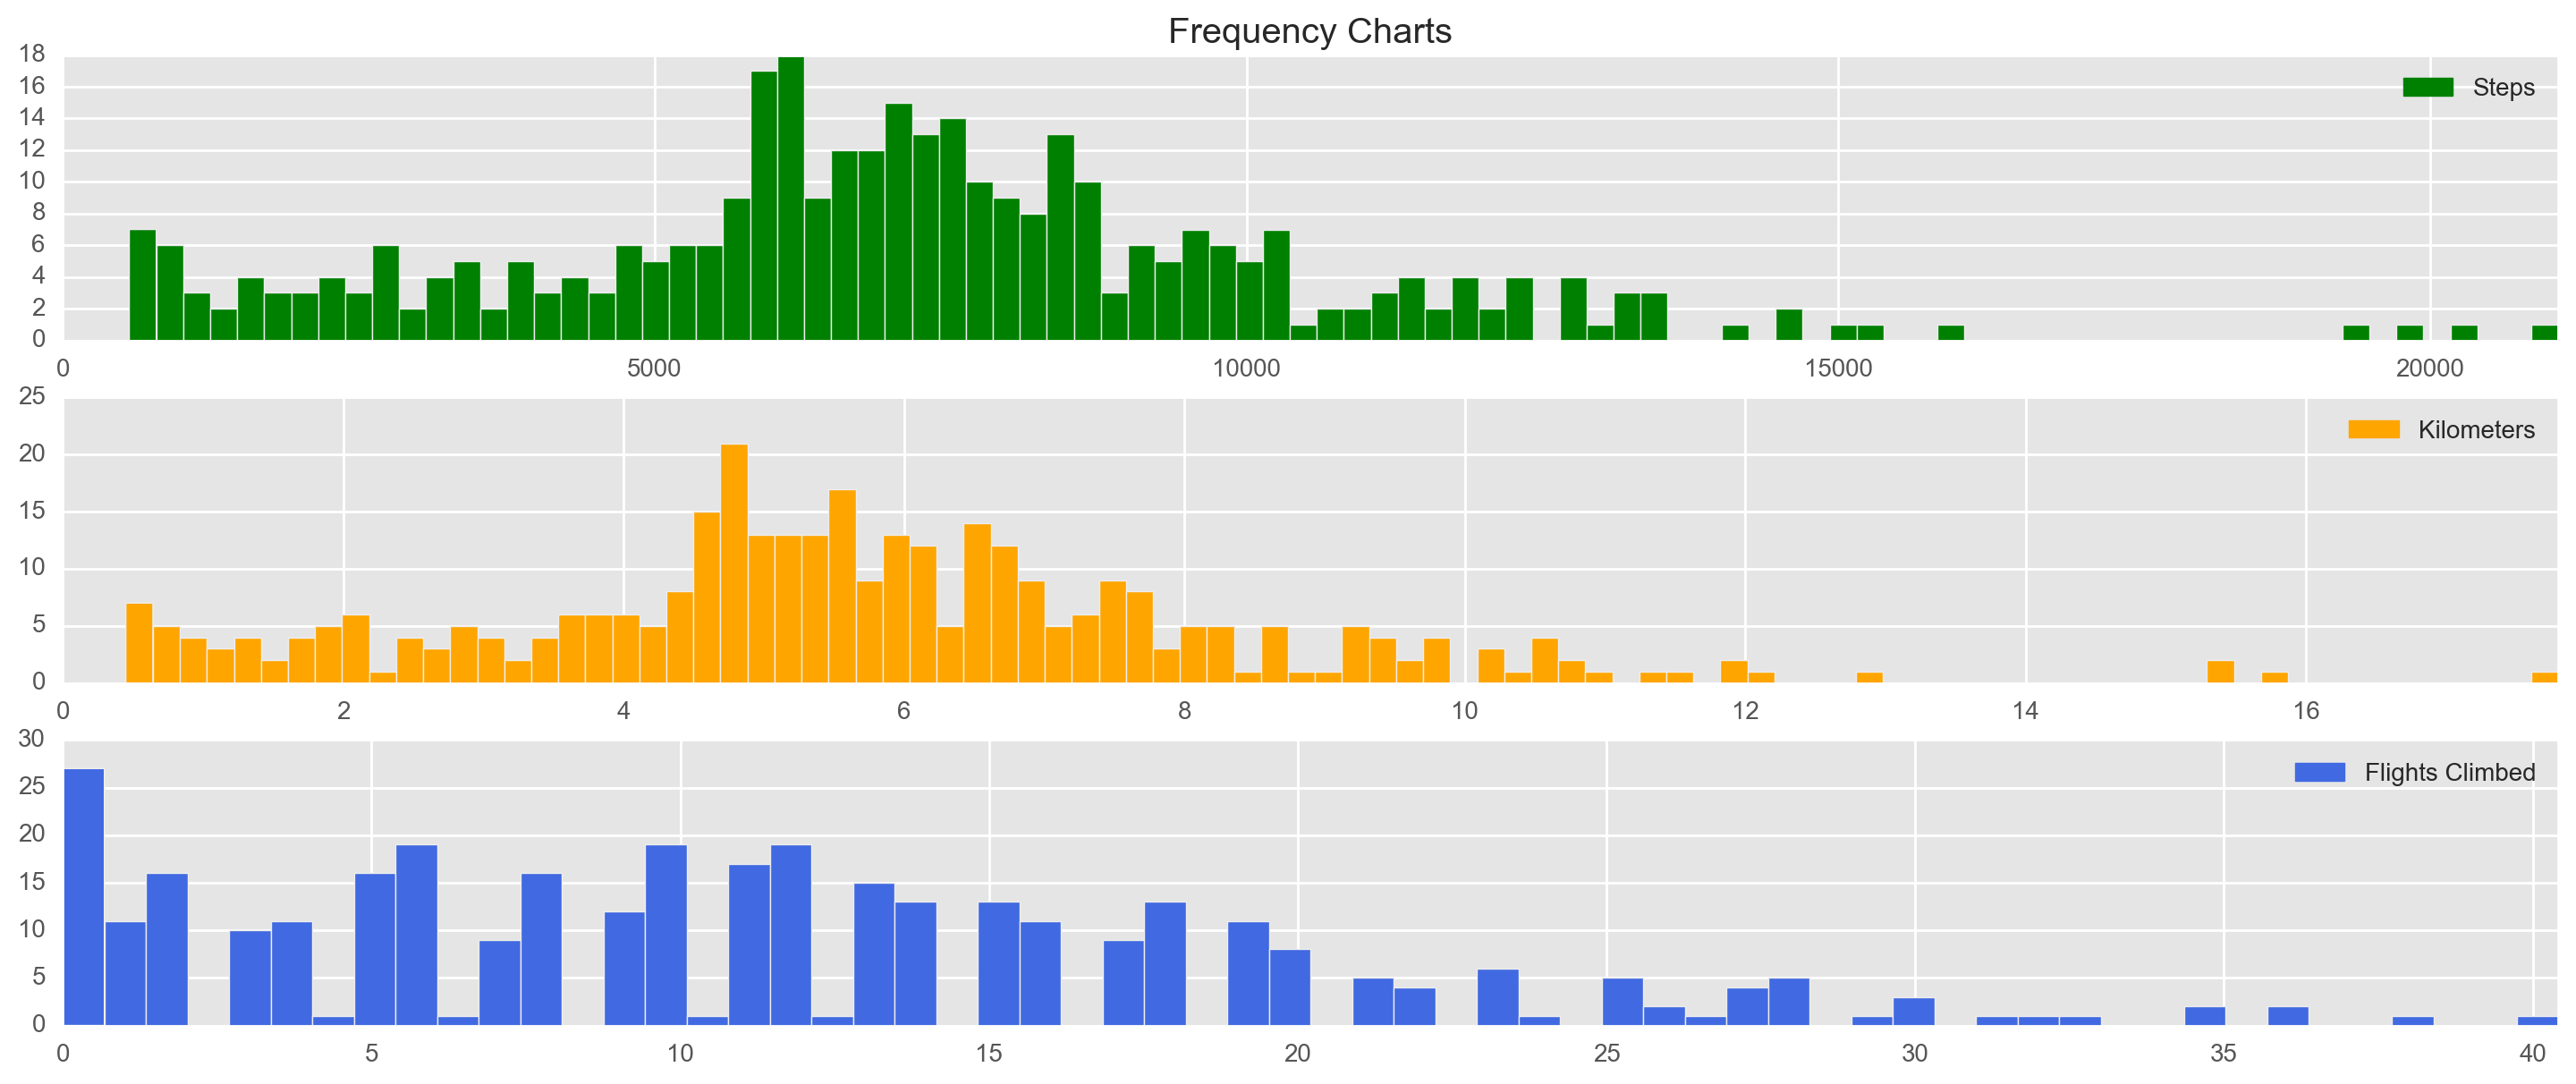

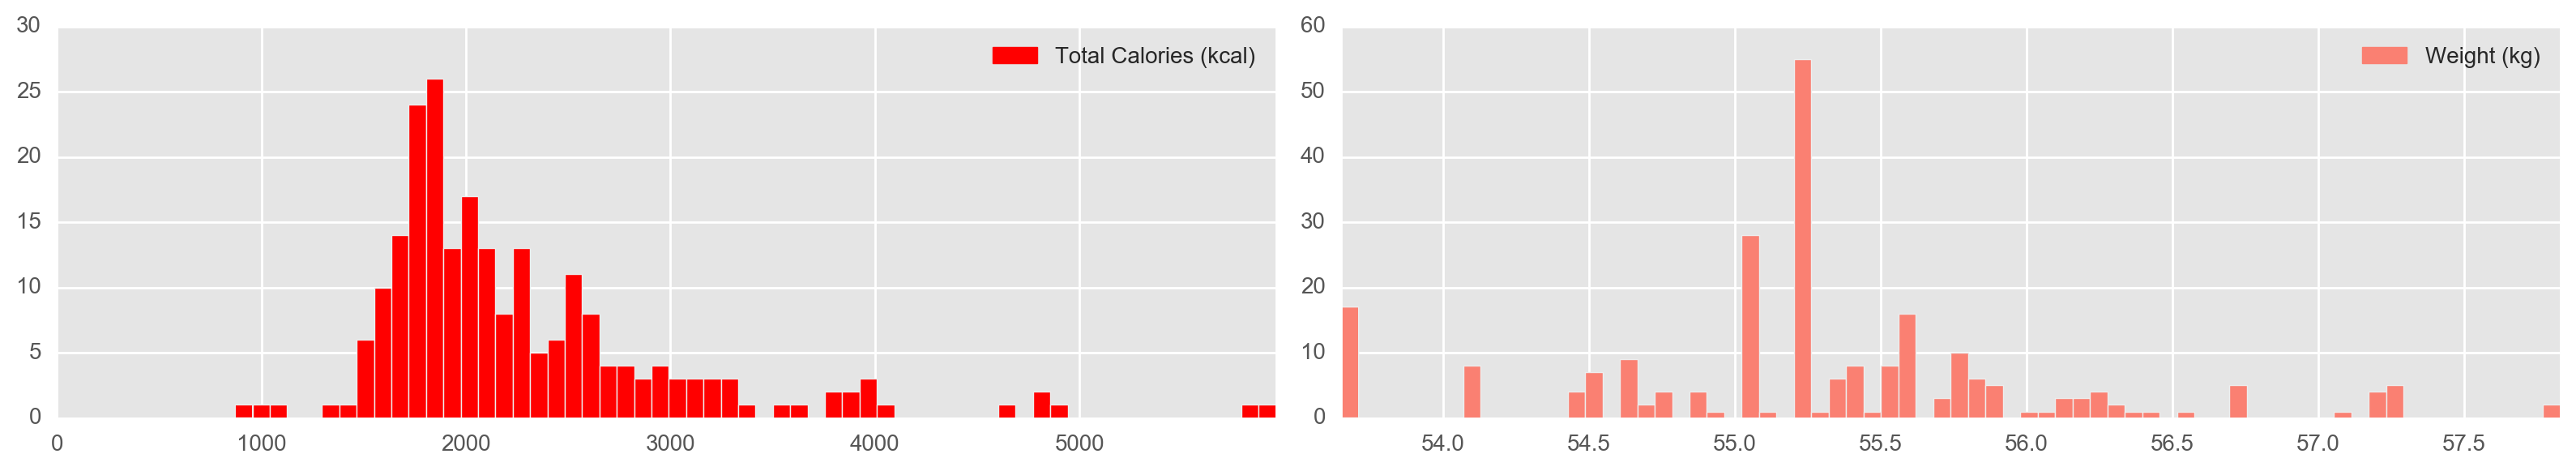

In [8]:
plt.figure(1,figsize=(18,7))

plt.subplot(311)
plt.title('Frequency Charts')
plt.legend(handles=[mpatches.Patch(color='green', label='Steps')])
plt.hist(data_for_steps.ix[:,'Steps (count)'], bins=90, color='g')
plt.xlim(0,data_for_steps.ix[:,'Steps (count)'].max())

plt.subplot(312)
plt.legend(handles=[mpatches.Patch(color='orange', label='Kilometers')])
plt.hist(data_for_steps.ix[:,'Distance (km)'], bins=90, color='orange')
plt.xlim(0,data_for_steps.ix[:,'Distance (km)'].max())

plt.subplot(313)
plt.legend(handles=[mpatches.Patch(color='royalblue', label='Flights Climbed')])
plt.hist(data_for_steps.ix[:,'Flights Climbed (count)'], bins=60, color='royalblue')
plt.xlim(0,data_for_steps.ix[:,'Flights Climbed (count)'].max())

plt.figure(2,figsize=(16,3))
plt.subplot(121)
plt.legend(handles=[mpatches.Patch(color='red', label='Total Calories (kcal)')])
plt.hist(data_for_cal.ix[:,'Total Calories (kcal)'], bins=60, color='red')
plt.xlim(0,data_for_cal.ix[:,'Total Calories (kcal)'].max())

plt.subplot(122)
plt.legend(handles=[mpatches.Patch(color='salmon', label='Weight (kg)')])
plt.hist(data_for_weight.ix[:,'Weight (kg)'], bins=70, color='salmon')
plt.xlim(data_for_weight.ix[:,'Weight (kg)'].min(),data_for_weight.ix[:,'Weight (kg)'].max())

plt.tight_layout()
plt.show()

count         mean          std    min     25%     50%     75%  \
Steps (count)  345.0  7115.721739  3394.621334  562.0  5407.0  7038.0  8731.0   

                   max  
Steps (count)  21082.0

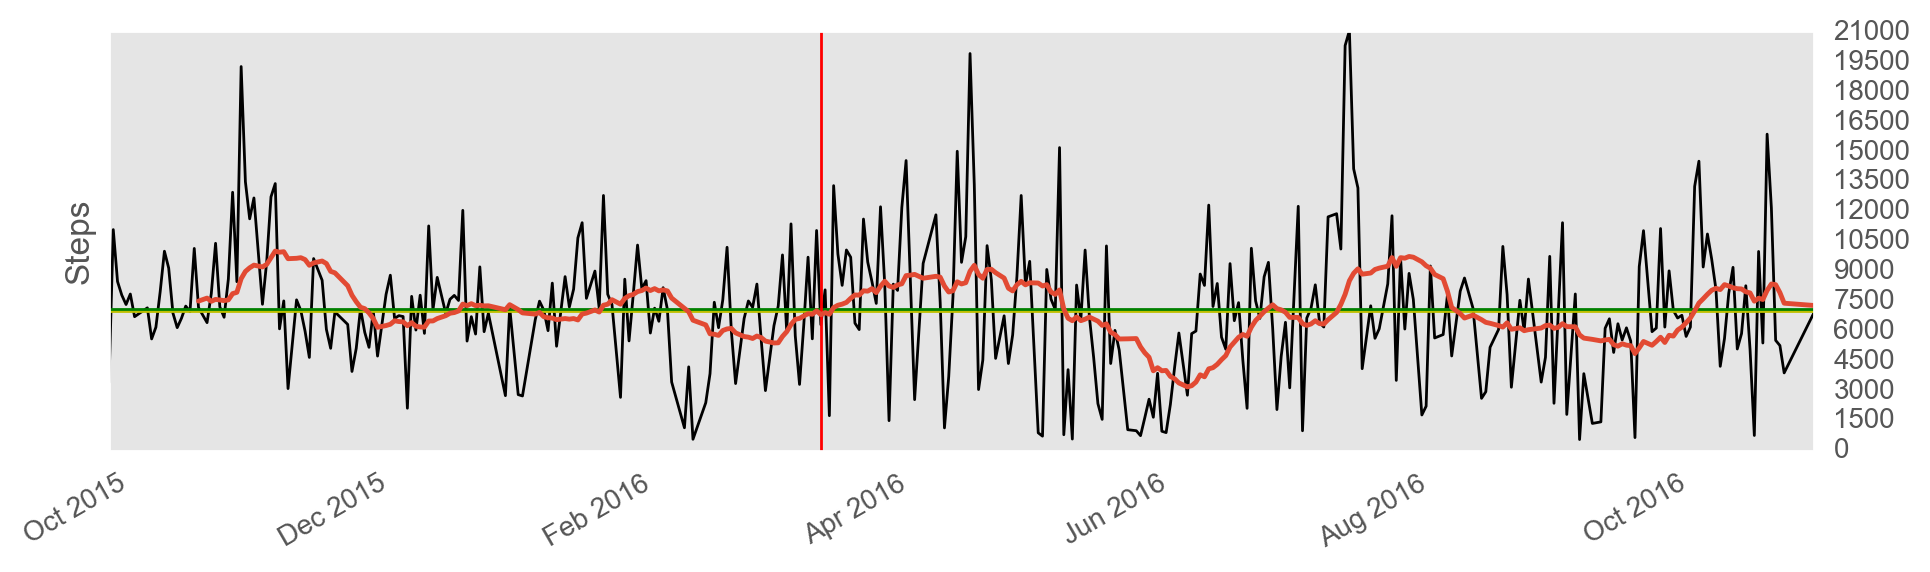

In [9]:
medianval = np.round(data_for_steps.ix[:,'Steps (count)'].median(),1)
avgval = np.round(data_for_steps.ix[:,'Steps (count)'].mean(),1)
maxval = np.round(data_for_steps.ix[:,'Steps (count)'].max(),1)

minor_ticks = np.arange(0, maxval+1, 1500, dtype=int)
minor_labels = minor_ticks

ax1 = data_for_steps.ix[:,'Steps (count)'].plot(color='000000',figsize=(11, 3),linewidth=1.0)

ax1.set_ylim(0,maxval)
ax1.set_ylabel('Steps')
ax1.set_yticks(minor_ticks)
ax1.set_yticklabels(minor_labels)
ax1.yaxis.tick_right()

ax1.set_xticks(data_for_steps.index, minor=True)
#Add the horizontal and vertical lines
ax1.axhline(y=medianval, linewidth=1, color='y')
ax1.axhline(y=avgval, linewidth=1, color='g')
ax1.axvline(x='2016-03-11', linewidth=1, color='r')
ax1.grid(b=False)

#Rolling 20 Day MA
ma = data_for_steps.ix[:,'Steps (count)'].rolling(20).mean()
ax1.plot(ma)

pd.DataFrame(data_for_steps["Steps (count)"].describe()).transpose()

count       mean       std  min  25%   50%   75%  \
Flights Climbed (count)  345.0  11.574646  8.371131  0.0  5.0  11.0  17.0   

                             max  
Flights Climbed (count)  40.4134

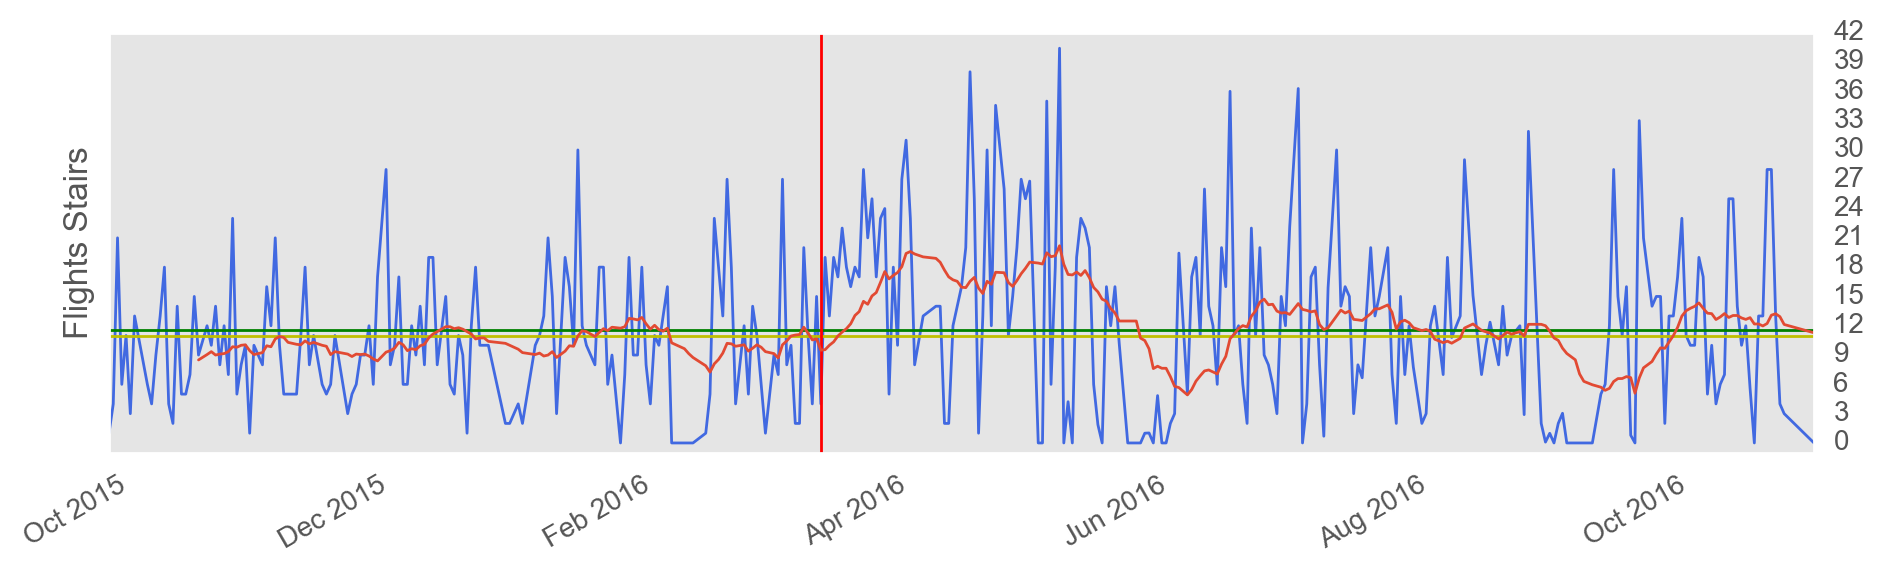

In [10]:
medianval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].median(),1)
avgval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].mean(),1)
maxval2 = np.round(data_for_steps.ix[:,'Flights Climbed (count)'].max(),1)

minor_ticks_stairs = np.arange(0, maxval2+2, 3, dtype=int)
minor_labels_stairs = minor_ticks_stairs

ax2 = data_for_steps.ix[:,'Flights Climbed (count)'].plot(color='royalblue',figsize=(11, 3),linewidth=1.0)

ax2.set_ylim(-1,maxval2)
ax2.set_ylabel('Flights Stairs')
ax2.set_yticks(minor_ticks_stairs)
ax2.set_yticklabels(minor_labels_stairs)
ax2.yaxis.tick_right()

#Add the horizontal and vertical lines
ax2.axhline(y=medianval2, linewidth=1, color='y')
ax2.axhline(y=avgval2, linewidth=1, color='g')
ax2.axvline(x='2016-03-11', linewidth=1, color='r')
ax2.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Flights Climbed (count)'].rolling(20).mean()
ax2.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Flights Climbed (count)'].describe()).transpose()

count      mean       std   min   25%       50%   75%   max
Distance (km)  345.0  5.667971  2.710204  0.45  4.32  5.527796  6.99  17.8

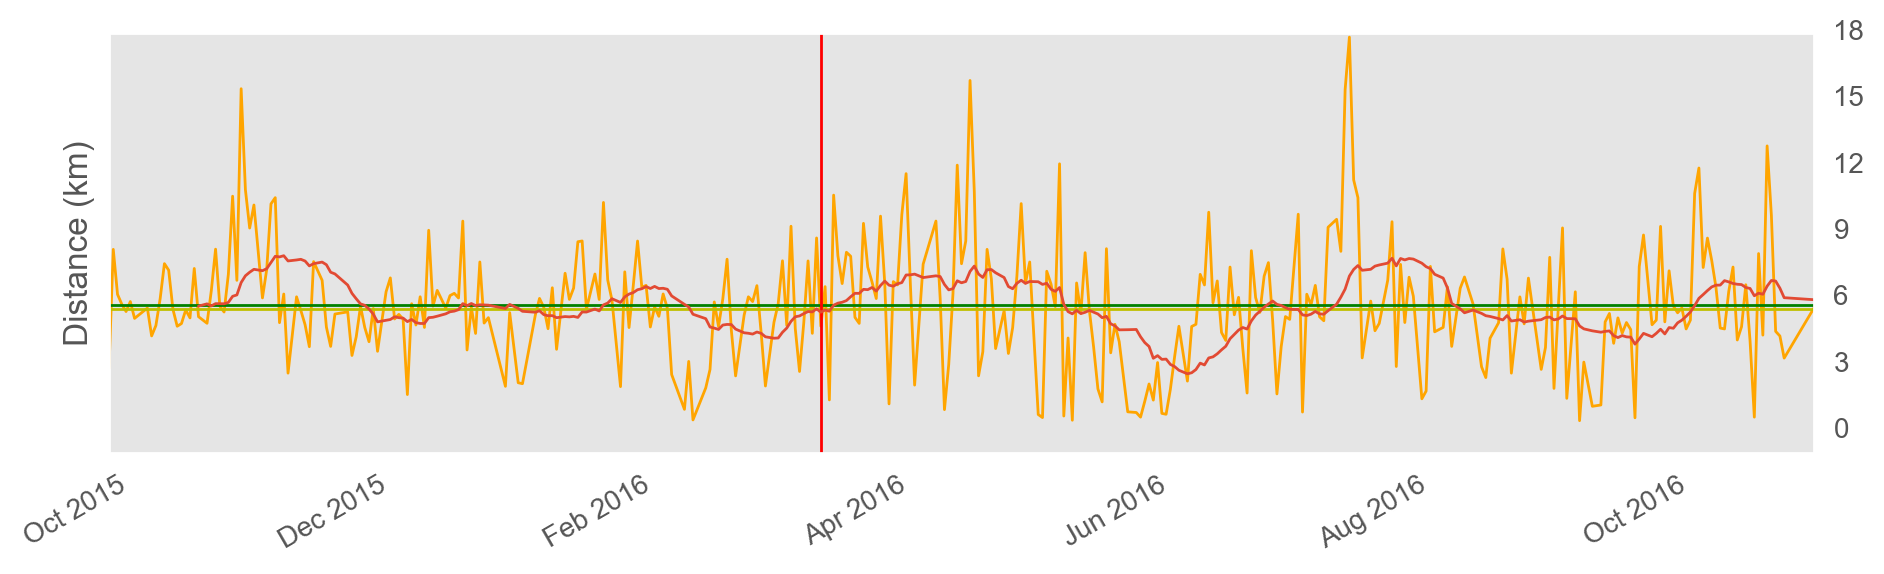

In [11]:
medianval3 = np.round(data_for_steps.ix[:,'Distance (km)'].median(),1)
avgval3 = np.round(data_for_steps.ix[:,'Distance (km)'].mean(),1)
maxval3 = np.round(data_for_steps.ix[:,'Distance (km)'].max(),1)

minor_ticks_km = np.arange(0, maxval3+1, 3, dtype=int)
minor_labels_km = minor_ticks_km

ax6 = data_for_steps.ix[:,'Distance (km)'].plot(color='orange',figsize=(11, 3),linewidth=1.0)

ax6.set_ylim(-1,data_for_steps.ix[:,'Distance (km)'].max())
ax6.set_ylabel('Distance (km)')
ax6.set_yticks(minor_ticks_km)
ax6.set_yticklabels(minor_labels_km)
ax6.yaxis.tick_right()

#Add the horizontal and vertical lines
ax6.axhline(y=medianval3, linewidth=1, color='y')
ax6.axhline(y=avgval3, linewidth=1, color='g')
ax6.axvline(x='2016-03-11', linewidth=1, color='r')
ax6.grid(b=False)

#Rolling 20 Day MA
ma2 = data_for_steps.ix[:,'Distance (km)'].rolling(20).mean()
ax6.plot(ma2,linewidth=1.0)

pd.DataFrame(data_for_steps['Distance (km)'].describe()).transpose()

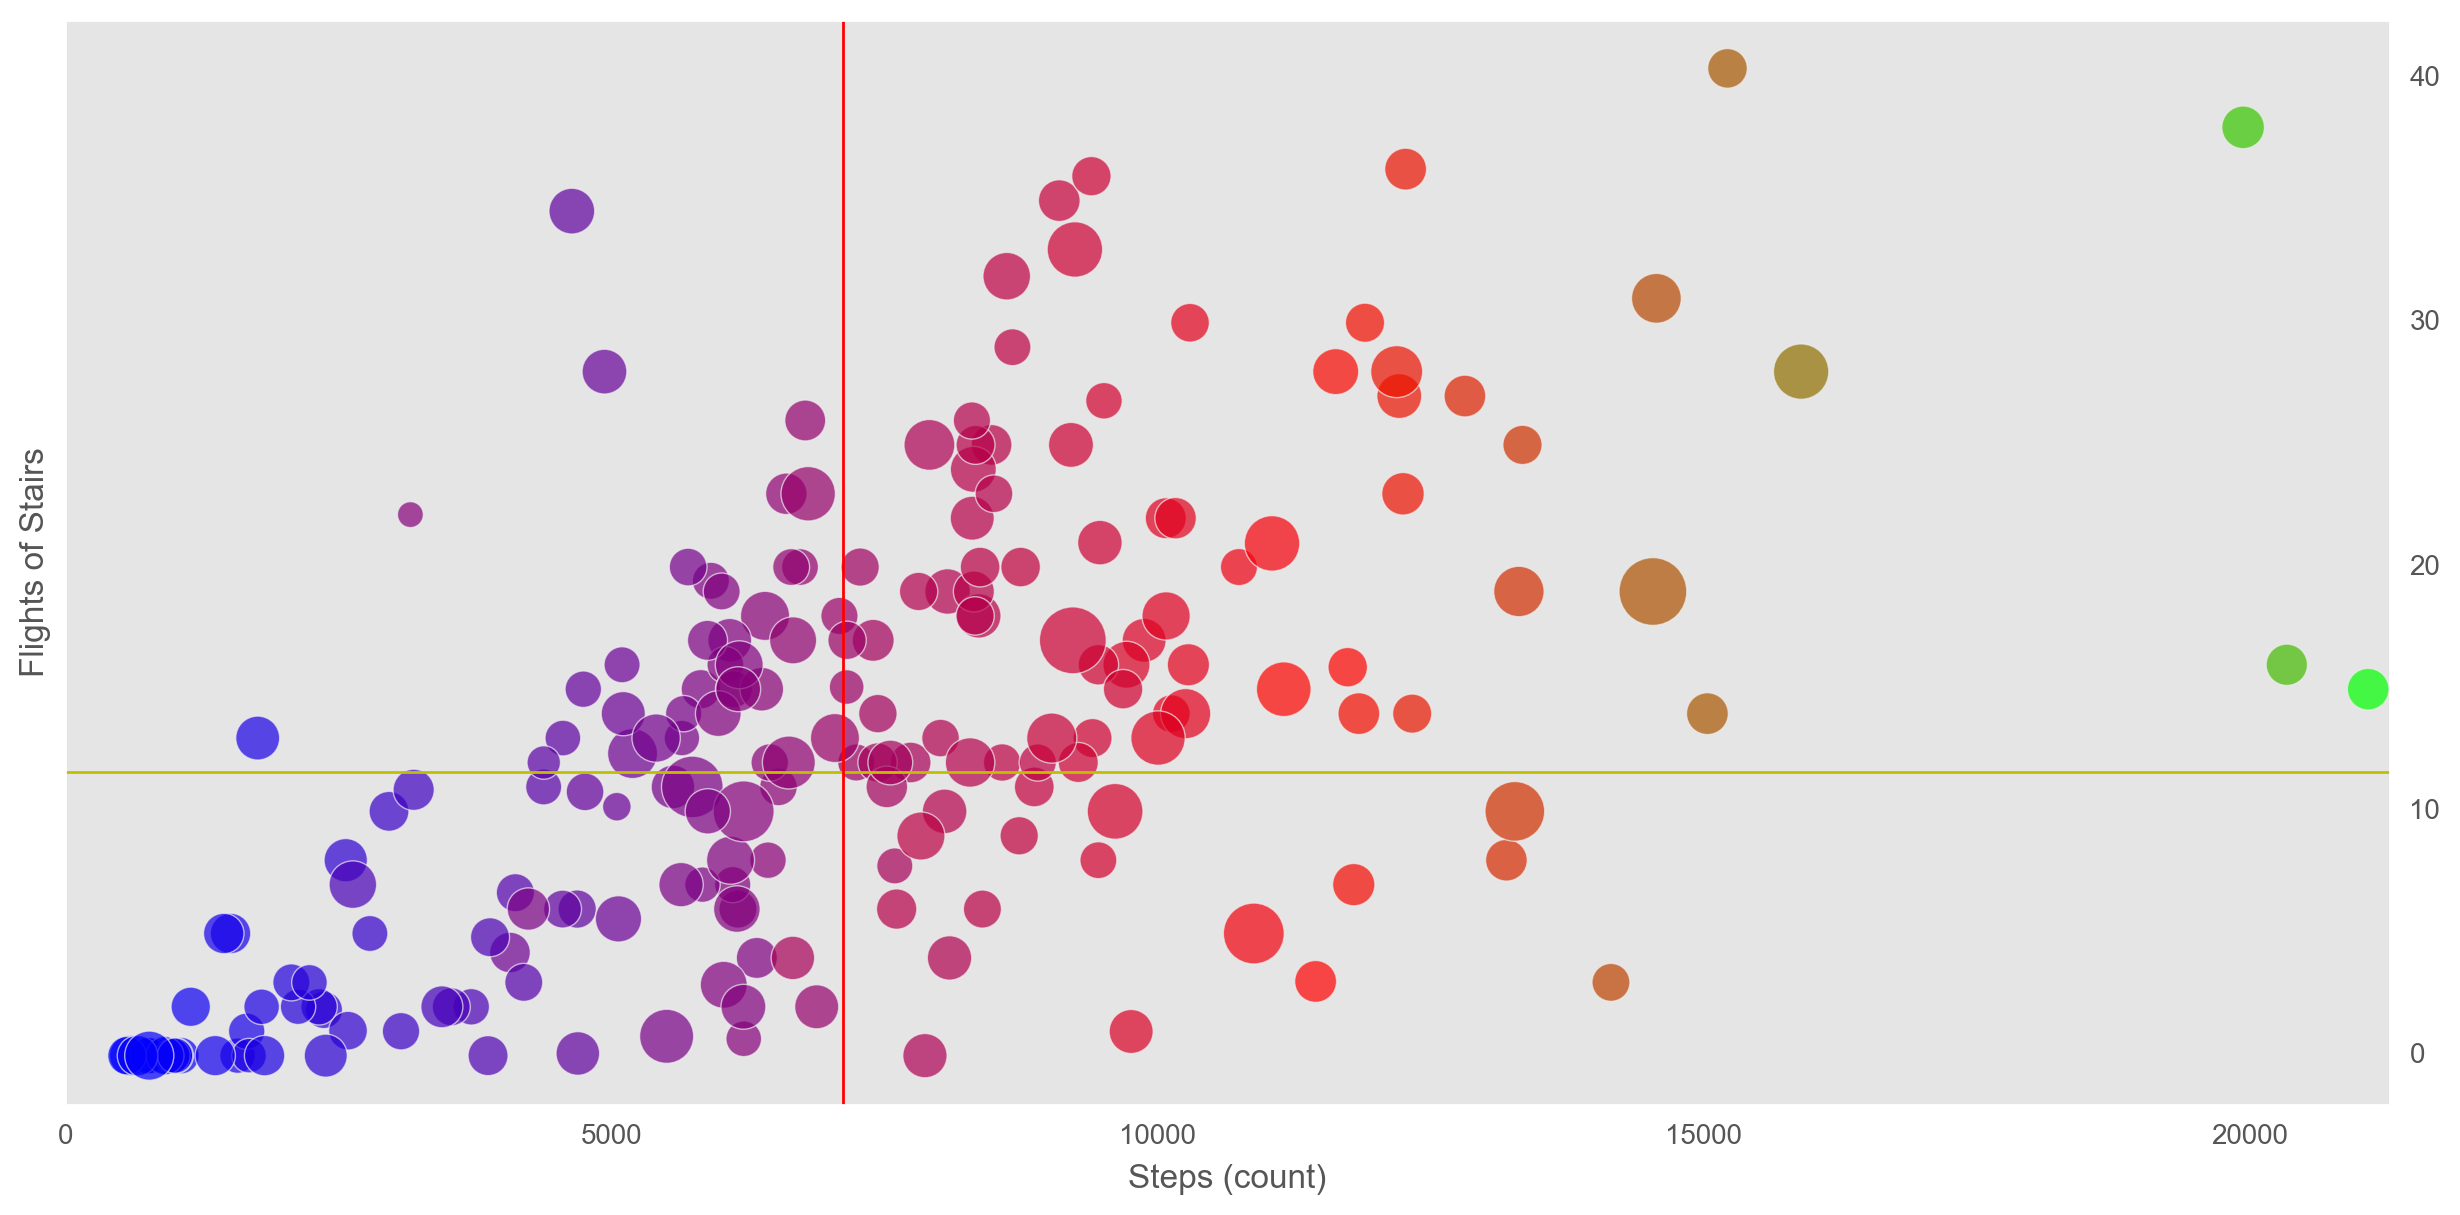

In [12]:
#Scatter chart Steps vs Stairs
plt.figure(1,figsize=(15,7))

x = data_for_steps.ix[:,'Steps (count)']
y = data_for_steps.ix[:,'Flights Climbed (count)']
plt.xlabel('Steps (count)')
plt.ylabel('Flights of Stairs')
plt.xlim(-5,data_for_steps.ix[:,'Steps (count)'].max()+200)
plt.tick_params(axis='y', which='both', labelleft='off', labelright='on')
plt.ylim(-2,data_for_steps.ix[:,'Flights Climbed (count)'].max()+2)
plt.grid(b=False)
plt.axhline(y=avgval2, linewidth=1, color='y')
plt.axvline(x=avgval, linewidth=1, color='r')

plt.scatter(x, y, alpha=0.7,c=data_for_steps.ix[:,'Distance (km)'], s=data_for_steps.ix[:,'Total Calories (kcal)']/10, cmap=cm.brg)
plt.show()

##### Most active day ever by number of climbed stairs

In [13]:
data_for_steps.ix[data_for_steps['Flights Climbed (count)']==data_for_steps['Flights Climbed (count)'].max()]

Active Calories (kcal)  Body Fat Percentage (%)  \
2016-05-06                   513.0                     12.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-05-06                     18.0          12.07                  40.4134   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-05-06                   115.0             48.91029   

            Resting Calories (kcal)  Steps (count)  Weight (kg)  \
2016-05-06                   1526.0        15216.0        55.77   

            Total Calories (kcal) Weekday  
2016-05-06                 2039.0   4 Fri

##### Most active day ever by number of steps

In [14]:
data_for_steps.ix[data_for_steps['Steps (count)']==data_for_steps['Steps (count)'].max()]

Active Calories (kcal)  Body Fat Percentage (%)  \
2016-07-13                   724.0                     10.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-07-13                     17.8           17.8                     15.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-07-13                   128.0             49.37088   

            Resting Calories (kcal)  Steps (count)  Weight (kg)  \
2016-07-13                   1525.0        21082.0        55.04   

            Total Calories (kcal) Weekday  
2016-07-13                 2249.0  2 Weds

##### Most active day ever by distance done

In [15]:
data_for_steps.ix[data_for_steps['Distance (km)']==data_for_steps['Distance (km)'].max()]

Active Calories (kcal)  Body Fat Percentage (%)  \
2016-07-13                   724.0                     10.3   

            Body Mass Index (count)  Distance (km)  Flights Climbed (count)  \
2016-07-13                     17.8           17.8                     15.0   

            Heart Rate (count/min)  Lean Body Mass (kg)  \
2016-07-13                   128.0             49.37088   

            Resting Calories (kcal)  Steps (count)  Weight (kg)  \
2016-07-13                   1525.0        21082.0        55.04   

            Total Calories (kcal) Weekday  
2016-07-13                 2249.0  2 Weds

#### Weight, Lean Body Mass and Body Fat % Analysis

Weight (kg)  Lean Body Mass (kg)  Body Fat Percentage (%)  \
2016-11-21        57.25                50.38                     12.8   

            Body Mass Index (count)  
2016-11-21                     18.5

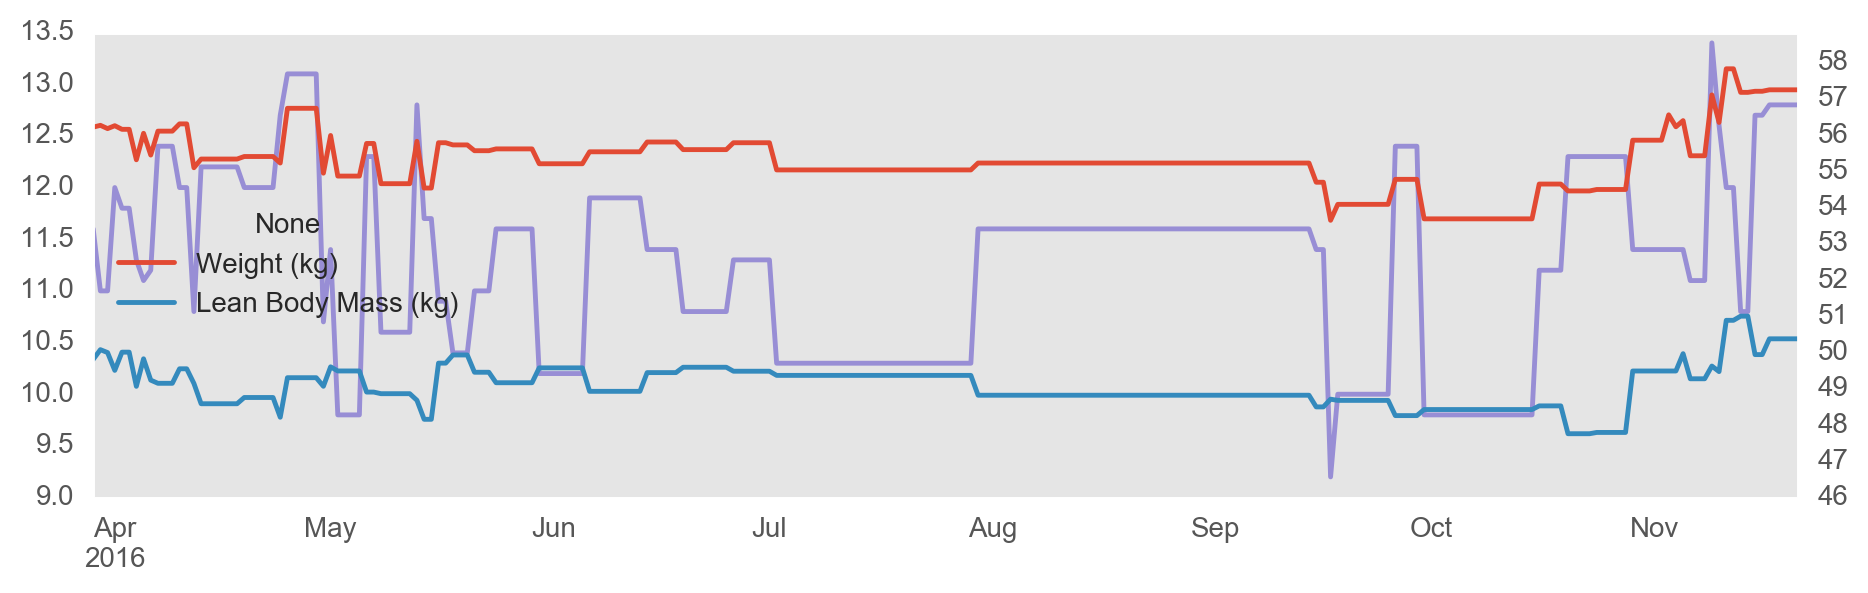

In [16]:
minor_ticks_weight = np.arange(data_for_weight['Lean Body Mass (kg)'].min()-1, data_for_weight['Weight (kg)'].max()+1, 1, dtype=int)
minor_labels_weight = minor_ticks_weight

ax9 = data_for_weight['Weight (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9 = data_for_weight['Lean Body Mass (kg)'].plot(secondary_y=True,figsize=(11, 3));
ax9.legend(loc=1, bbox_to_anchor=(0.5, 0.1), ncol=2)
ax9.grid(b=False)
ax9.yaxis.tick_right()
ax9.set_ylim(data_for_weight['Lean Body Mass (kg)'].min()-1,data_for_weight['Weight (kg)'].max()+1)
ax9.set_yticks(minor_ticks_weight)
ax9.set_yticklabels(minor_labels_weight)
ax4 = data_for_weight['Body Fat Percentage (%)'].plot(figsize=(11, 3))
ax4.yaxis.tick_left()
ax4.grid(b=False)

data_for_weight.tail(1)

In [17]:
#Averages, Medians, High, Low per Weekday
data_for_weekday.groupby('Weekday').agg(['mean','median','min','max','std']).transpose()

Weekday                                0 Mon         1 Tue        2 Weds  \
Active Calories (kcal)  mean      802.343750    686.937500    608.031250   
                        median    555.500000    597.500000    555.000000   
                        min        40.000000      0.000000      0.000000   
                        max      4100.000000   3946.000000   2946.000000   
                        std       835.491534    728.033717    595.964682   
Distance (km)           mean        5.553447      6.146152      6.380868   
                        median      5.643039      5.935501      5.708204   
                        min         0.450000      0.740000      0.484112   
                        max        11.880000     15.466486     17.800000   
                        std         2.371477      2.720320      2.877234   
Flights Climbed (count) mean       11.546813     11.647817     12.800898   
                        median     12.000000     11.000000     12.000000   
                        min         0.000000      0.000000      0.000000   
                        max        33.000000     35.000000     36.000000   
                        std         8.336511      8.425941      9.356140   
Heart Rate (count/min)  mean       78.918033     73.516667     73.516667   
                        median    105.000000    102.500000    104.000000   
                        min         0.000000      0.000000      0.000000   
                        max       175.000000    161.000000    172.000000   
                        std        66.303166     64.462705     64.292101   
Resting Calories (kcal) mean     1660.281250   1660.281250   1629.375000   
                        median   1532.000000   1532.000000   1531.000000   
                        min      1520.000000   1520.000000    790.000000   
                        max      1860.000000   1860.000000   1860.000000   
                        std       162.921361    162.921361    231.331734   
Steps (count)           mean     6993.254237   7554.627119   7869.824561   
                        median   7155.000000   7214.000000   7260.000000   
                        min       562.000000    910.000000    575.000000   
                        max     14533.000000  20337.000000  21082.000000   
                        std      2922.807865   3414.622243   3551.721585   
Total Calories (kcal)   mean     2462.625000   2347.218750   2237.406250   
                        median   2083.500000   2201.000000   2109.500000   
                        min      1566.000000   1636.000000    872.000000   
                        max      5960.000000   5806.000000   4806.000000   
                        std       950.180620    814.771479    726.525663   

Weekday                              3 Thurs         4 Fri         5 Sat  \
Active Calories (kcal)  mean      621.312500    545.937500    592.156250   
                        median    377.000000    441.000000    367.000000   
                        min         0.000000      0.000000      0.000000   
                        max      2177.000000   3059.000000   2957.000000   
                        std       585.496670    583.820340    666.218656   
Distance (km)           mean        6.237666      6.641537      4.224002   
                        median      5.838327      6.471551      3.810000   
                        min         1.100000      1.460000      0.660000   
                        max        11.625000     15.840000     10.810000   
                        std         2.288325      2.680066      2.348777   
Flights Climbed (count) mean       11.302573     10.918825      5.651487   
                        median     10.000000     10.190289      4.000000   
                        min         0.000000      0.000000      0.000000   
                        max        34.569647     40.413400     26.000000   
                        std         9.204706      9.665701      6.513046   
Heart Rate (count/min)  mean       68.533333   

#### Heart Rate Data Analysis

[]

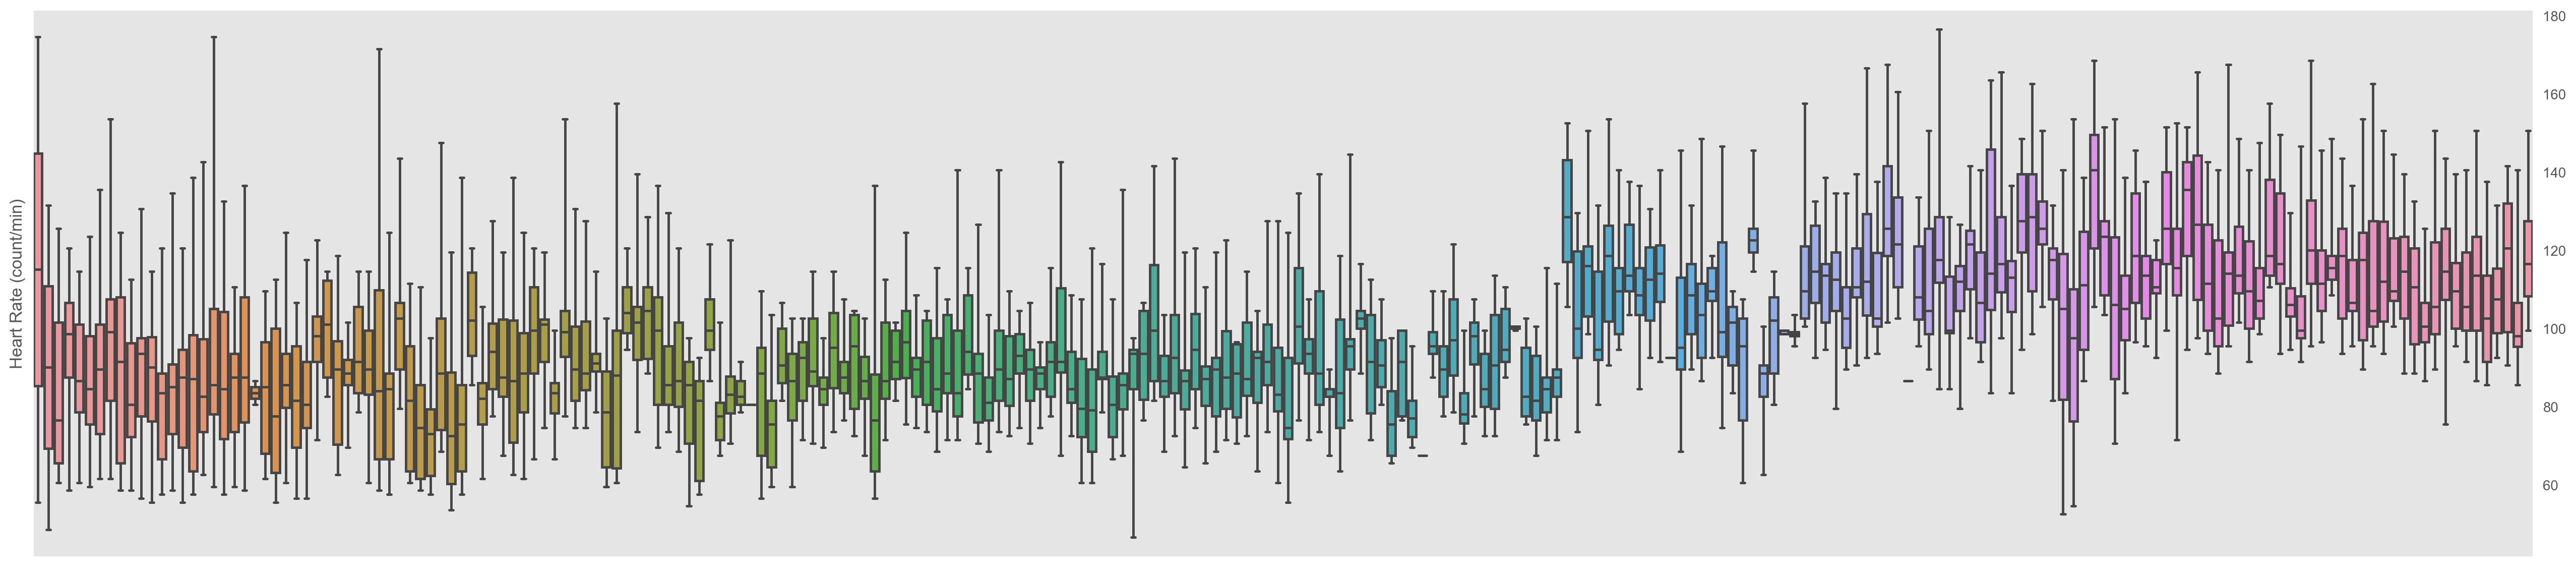

In [18]:
#Box Plot for Heart Rate Data 
plt.figure(figsize=(32,7))
ax5 = sns.boxplot(x="Date", y="Heart Rate (count/min)", data=hr_intraday, whis=[0,100])
ax5.set_ylim(hr_intraday['Heart Rate (count/min)'].min()-5,hr_intraday['Heart Rate (count/min)'].max()+5)
ax5.set_xticklabels(hr_intraday['Date'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
ax5.axes.get_xaxis().set_visible(False)
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)
ax5.plot()

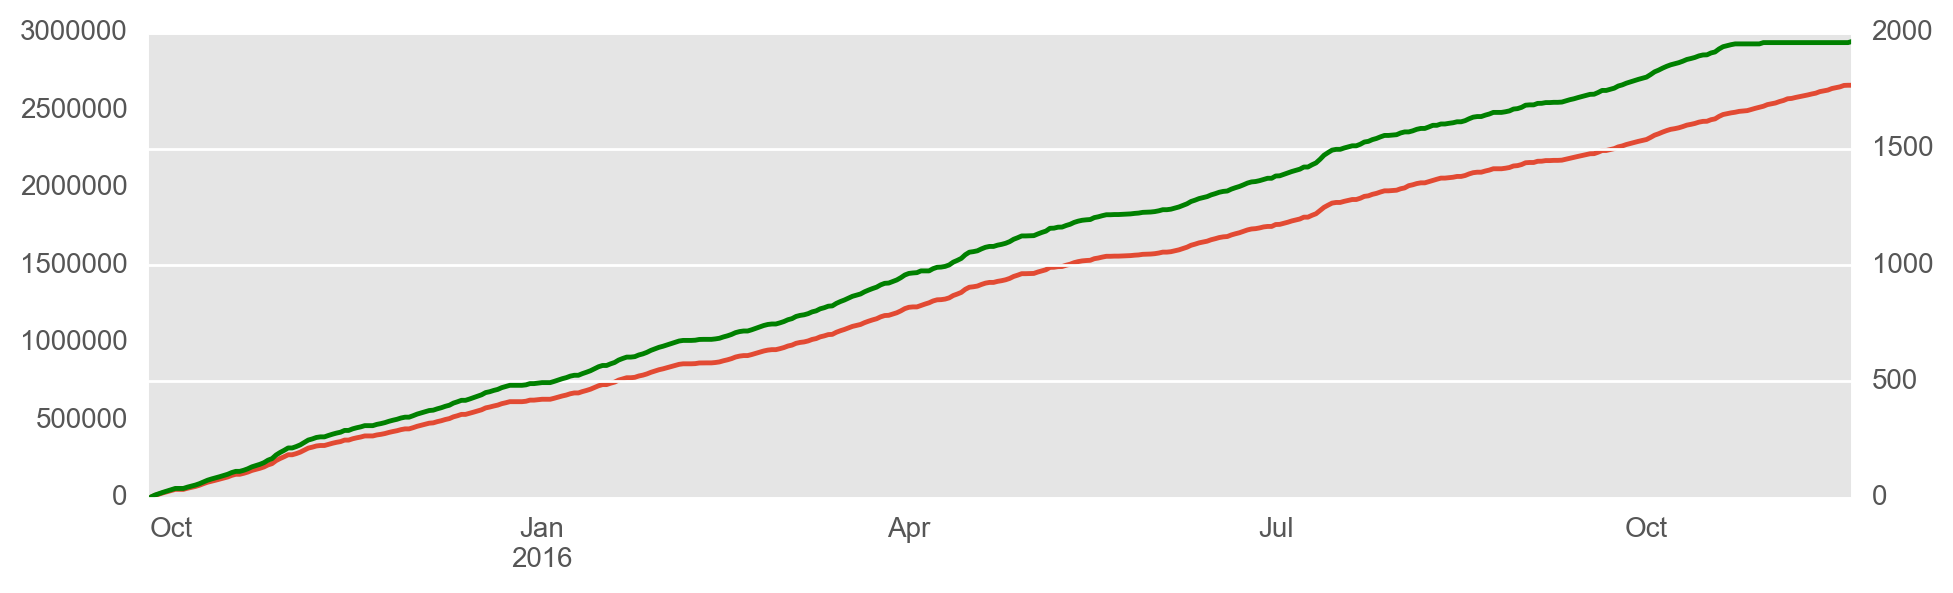

In [19]:
#Cumulative Charts
#Cumulative steps done
#Cumulative km walked
#Cumulative dataset

cumulative = data[['Steps (count)','Distance (km)','Flights Climbed (count)']].copy()
cumulative = cumulative.cumsum(axis=0, skipna=True)
cumulative = cumulative.fillna(method='ffill')
cumulative['Steps (count)'].plot(figsize=(11,3))
cumulative['Distance (km)'].plot(secondary_y=True, style='g')

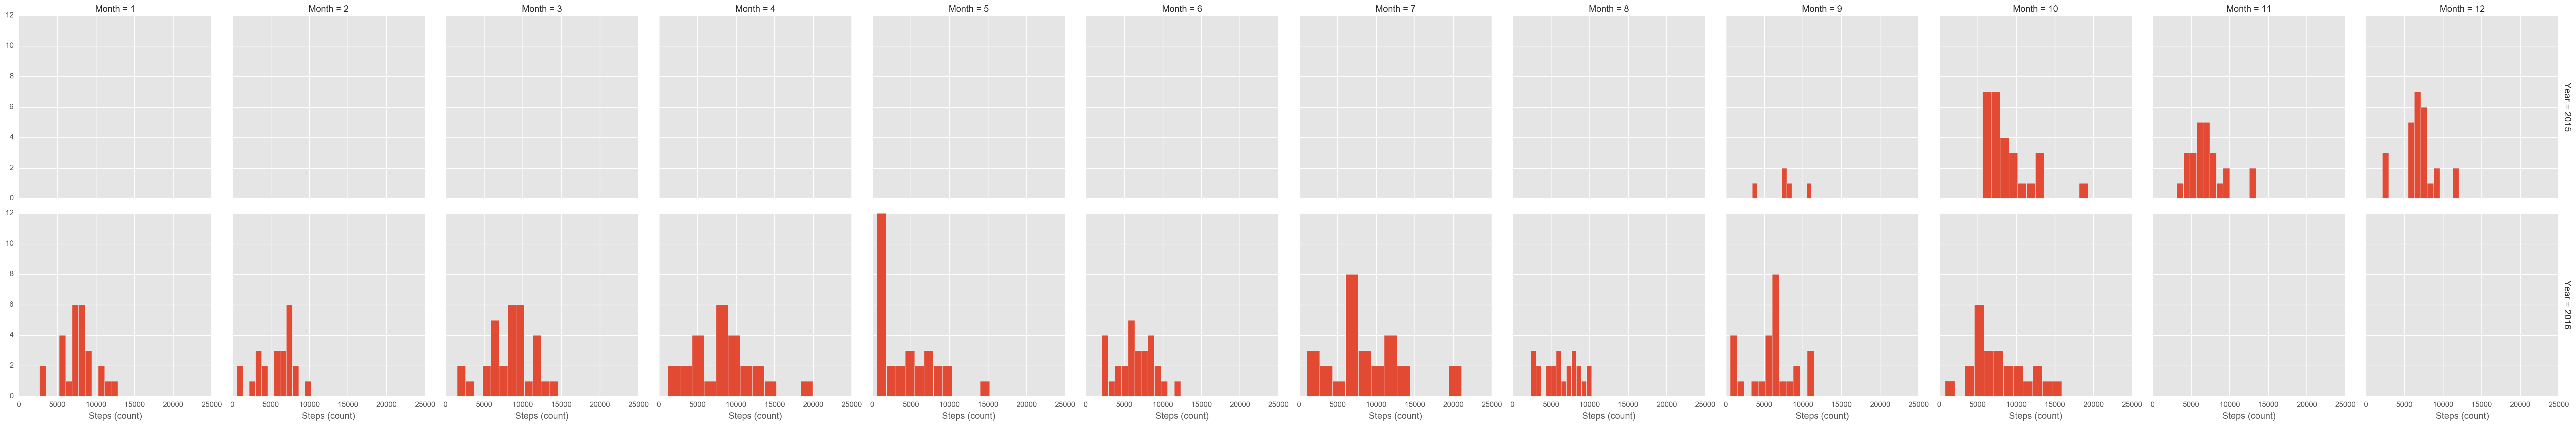

In [20]:
#matrix charts histograms steps done per month
matrixdata = data_for_steps[['Steps (count)','Distance (km)','Flights Climbed (count)','Weekday']].copy()
matrixdata['Month']=pd.to_datetime(matrixdata.index).month
matrixdata['Year']=pd.to_datetime(matrixdata.index).year
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=12)

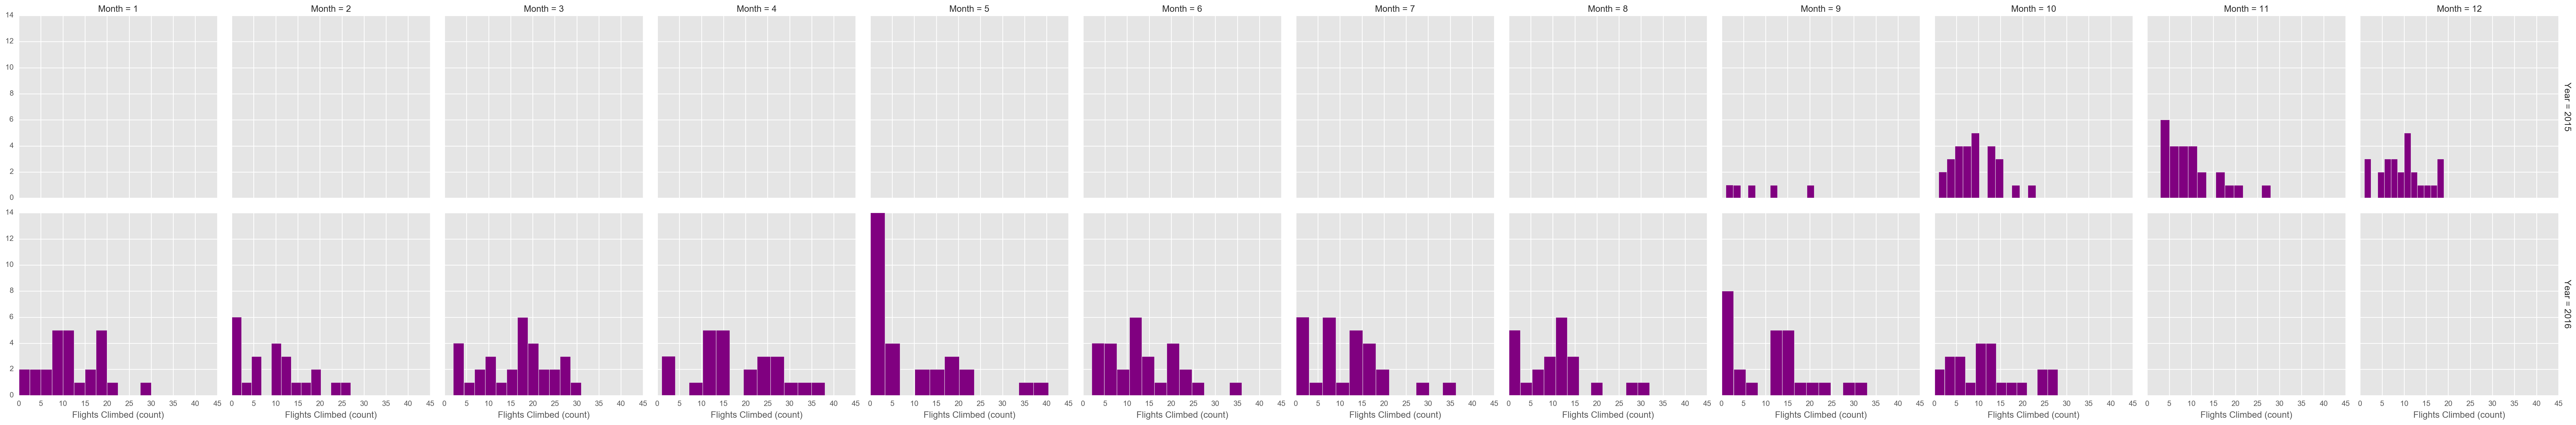

In [21]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=12, color="purple")

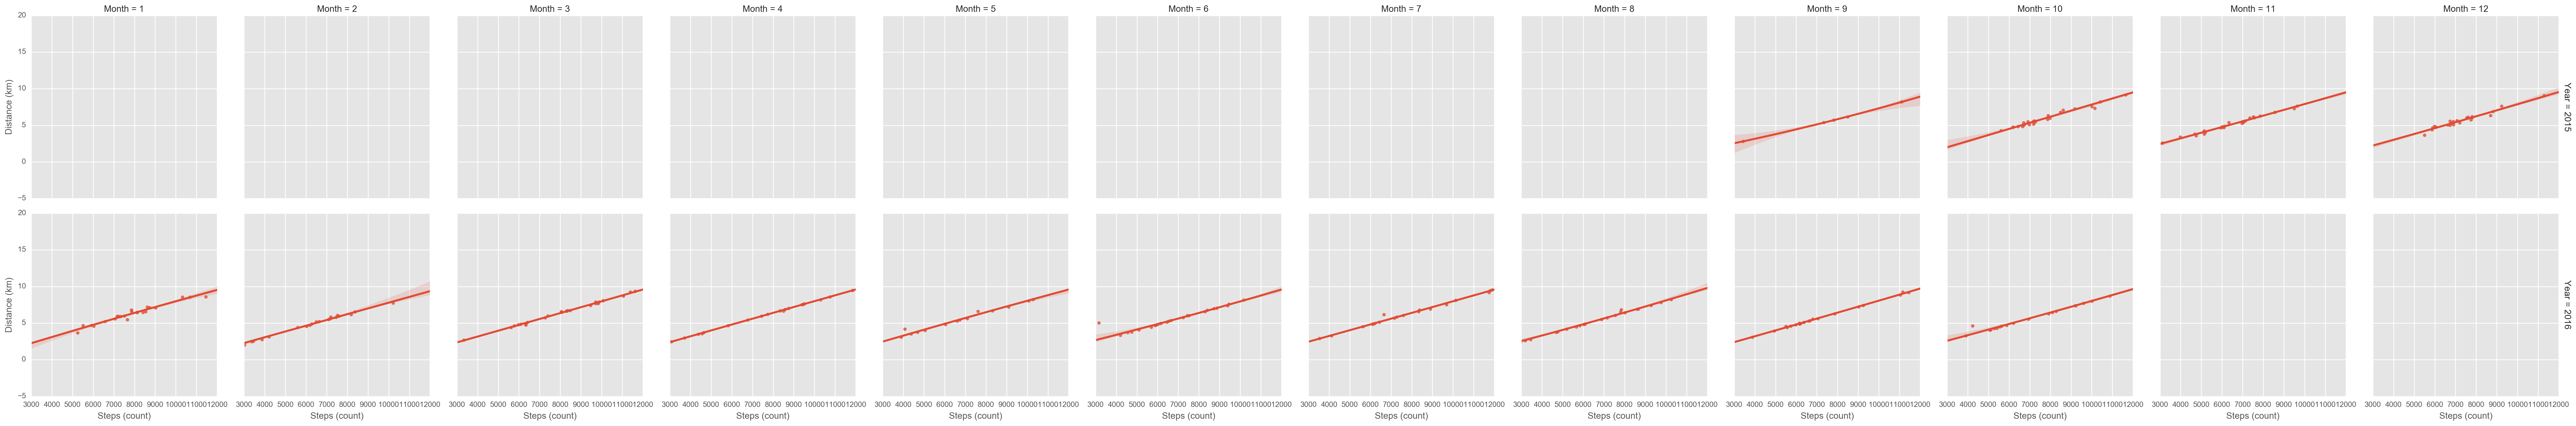

In [22]:
g = sns.FacetGrid(matrixdata, row="Year", col="Month", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

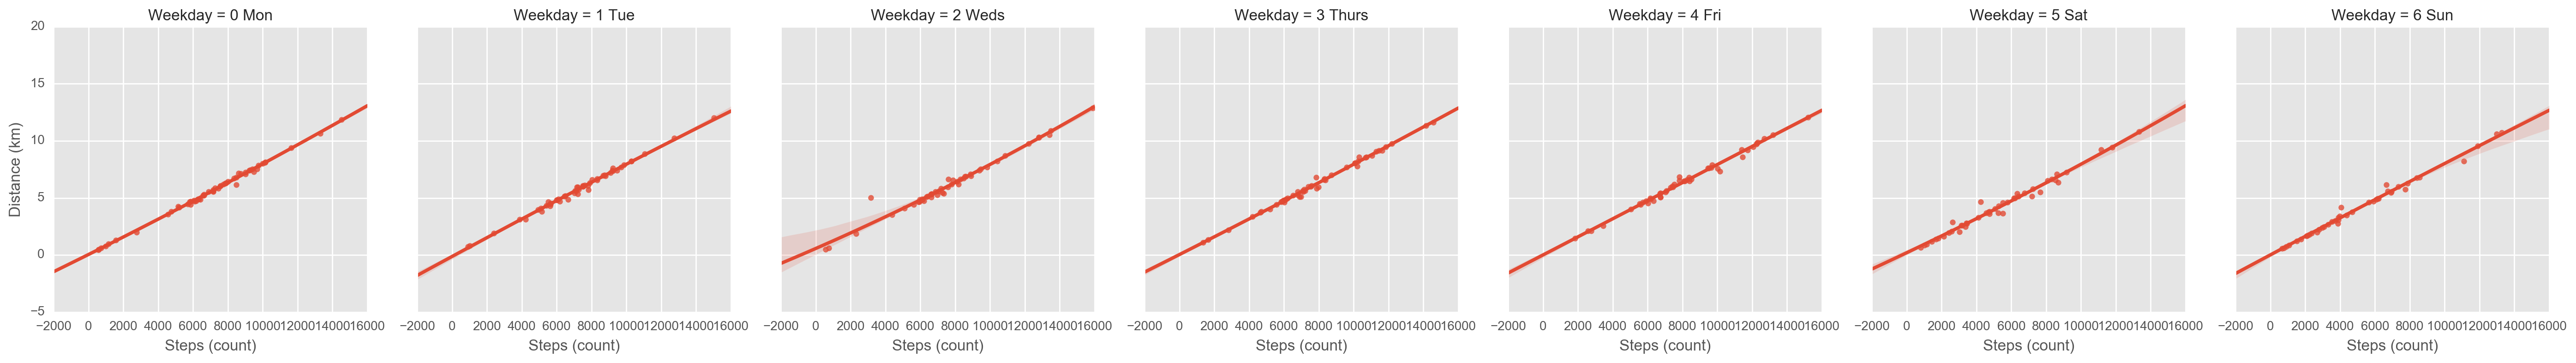

In [23]:
matrixdata = matrixdata.sort("Weekday")
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(sns.regplot, "Steps (count)", "Distance (km)", order=2)

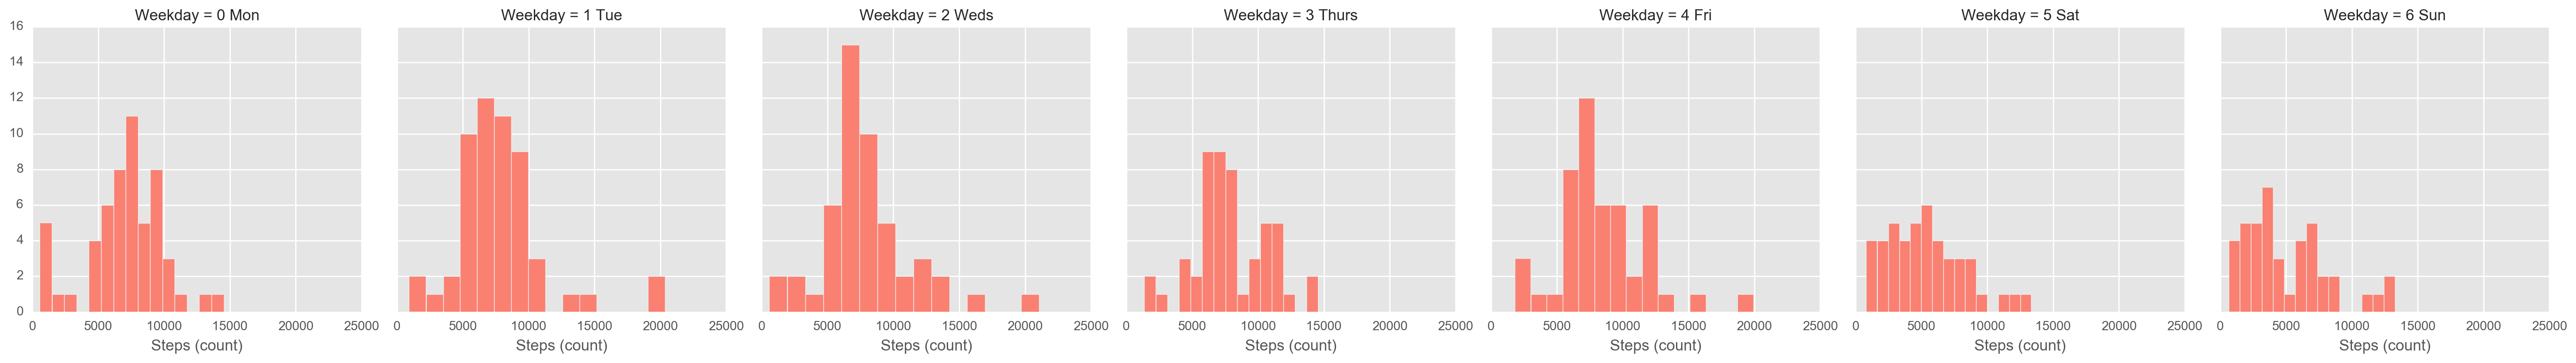

In [24]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=15, color="salmon")

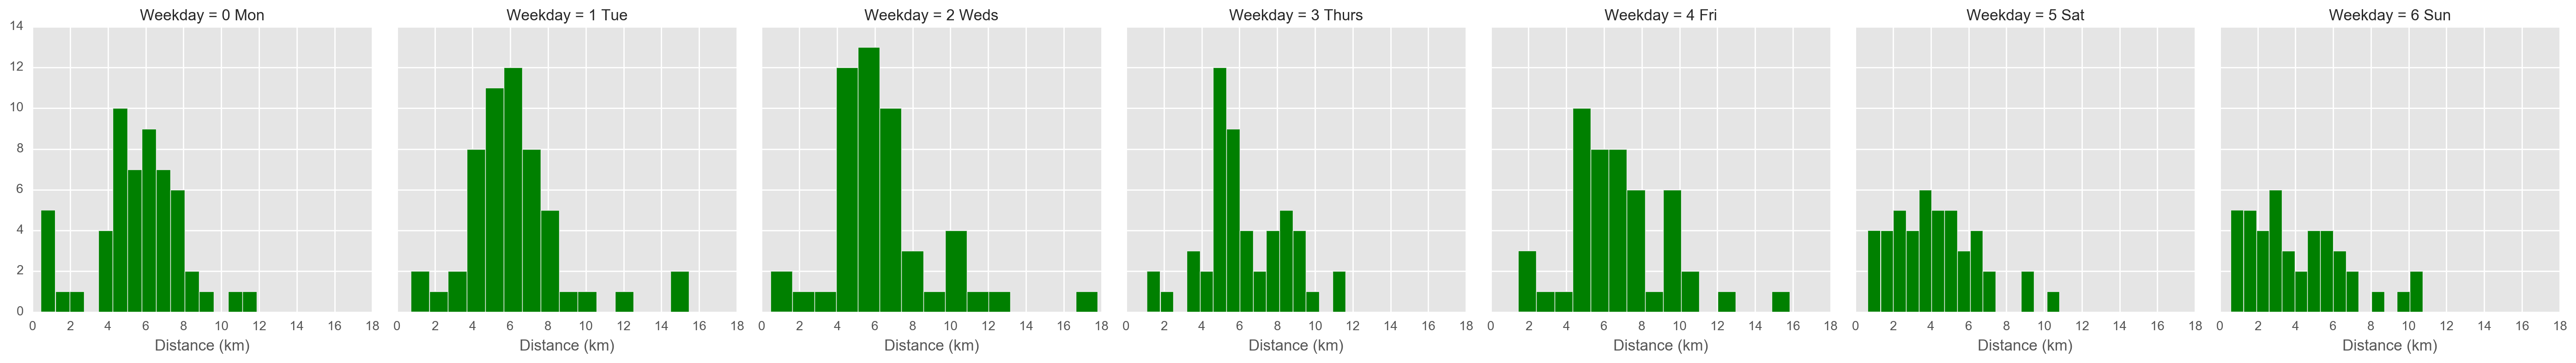

In [25]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Distance (km)", bins=15, color="g")

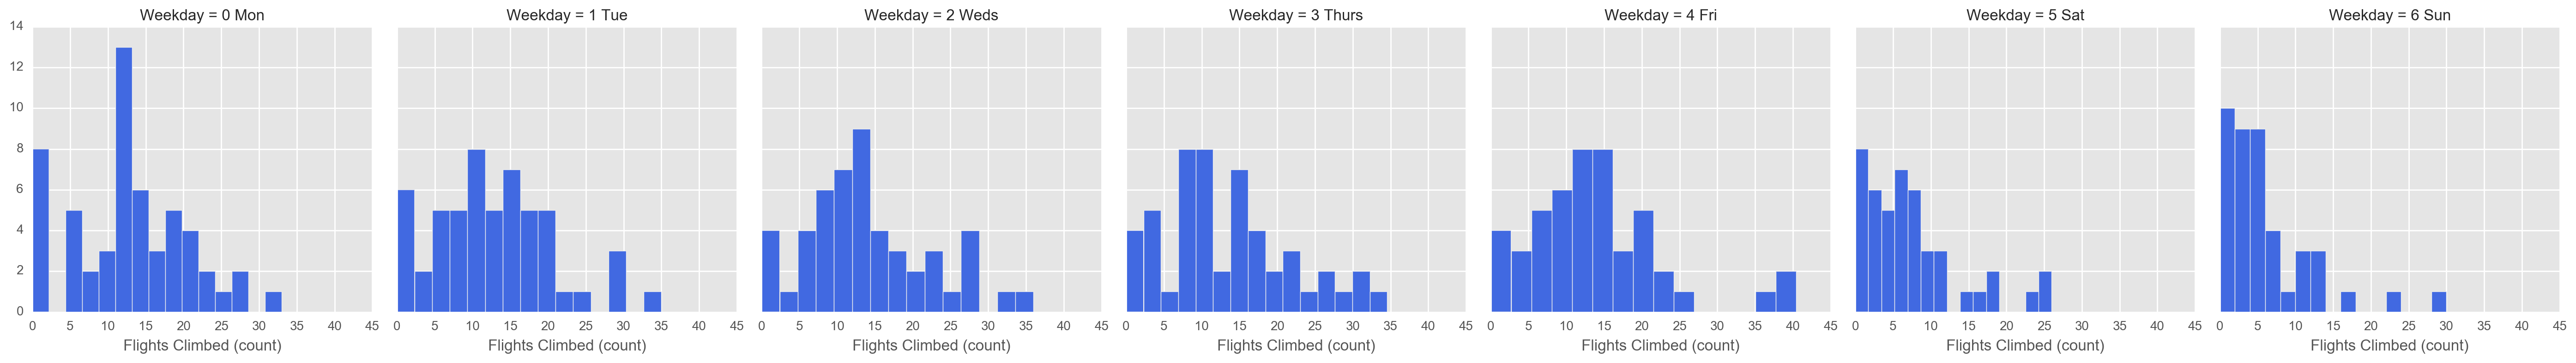

In [26]:
g = sns.FacetGrid(matrixdata, col="Weekday", size=4, margin_titles=True)
g.map(plt.hist, "Flights Climbed (count)", bins=15, color="royalblue")

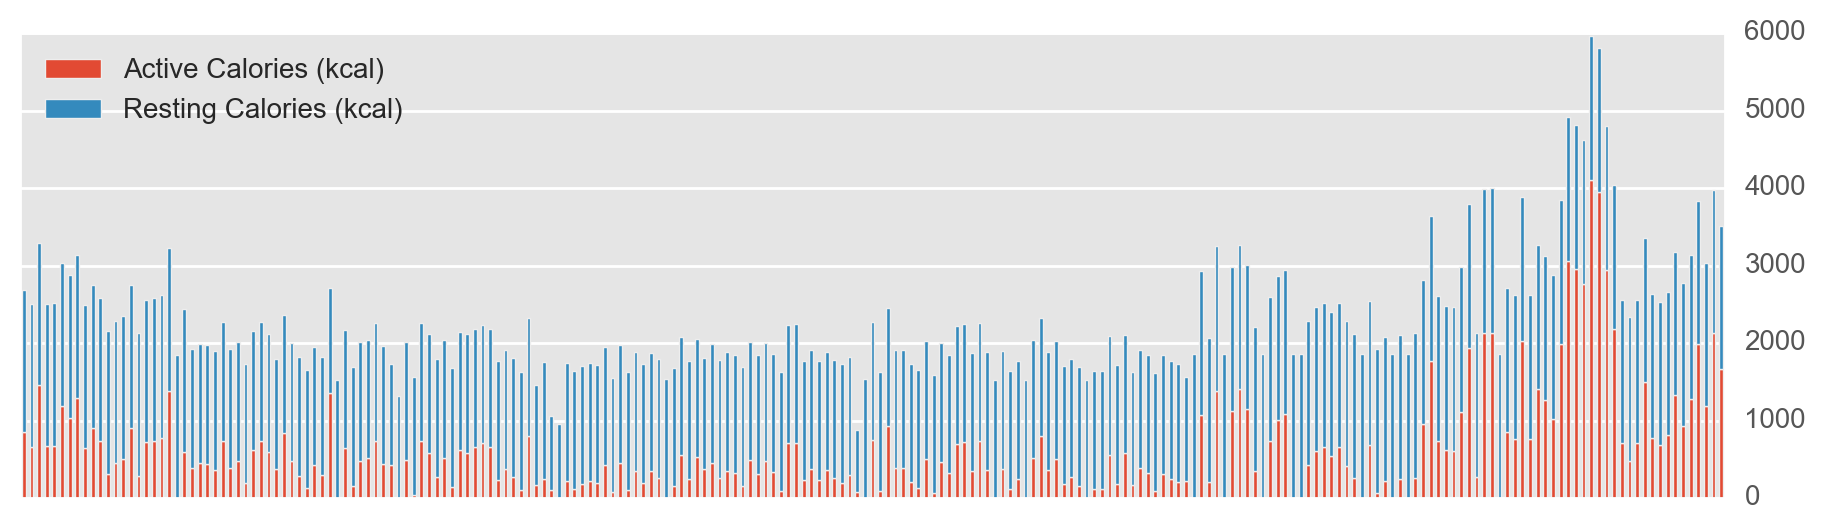

In [27]:
ax7 = data_for_cal2.plot.bar(stacked=True, figsize=(11, 3))
ax7.axes.get_xaxis().set_visible(False)
ax7.yaxis.tick_right()

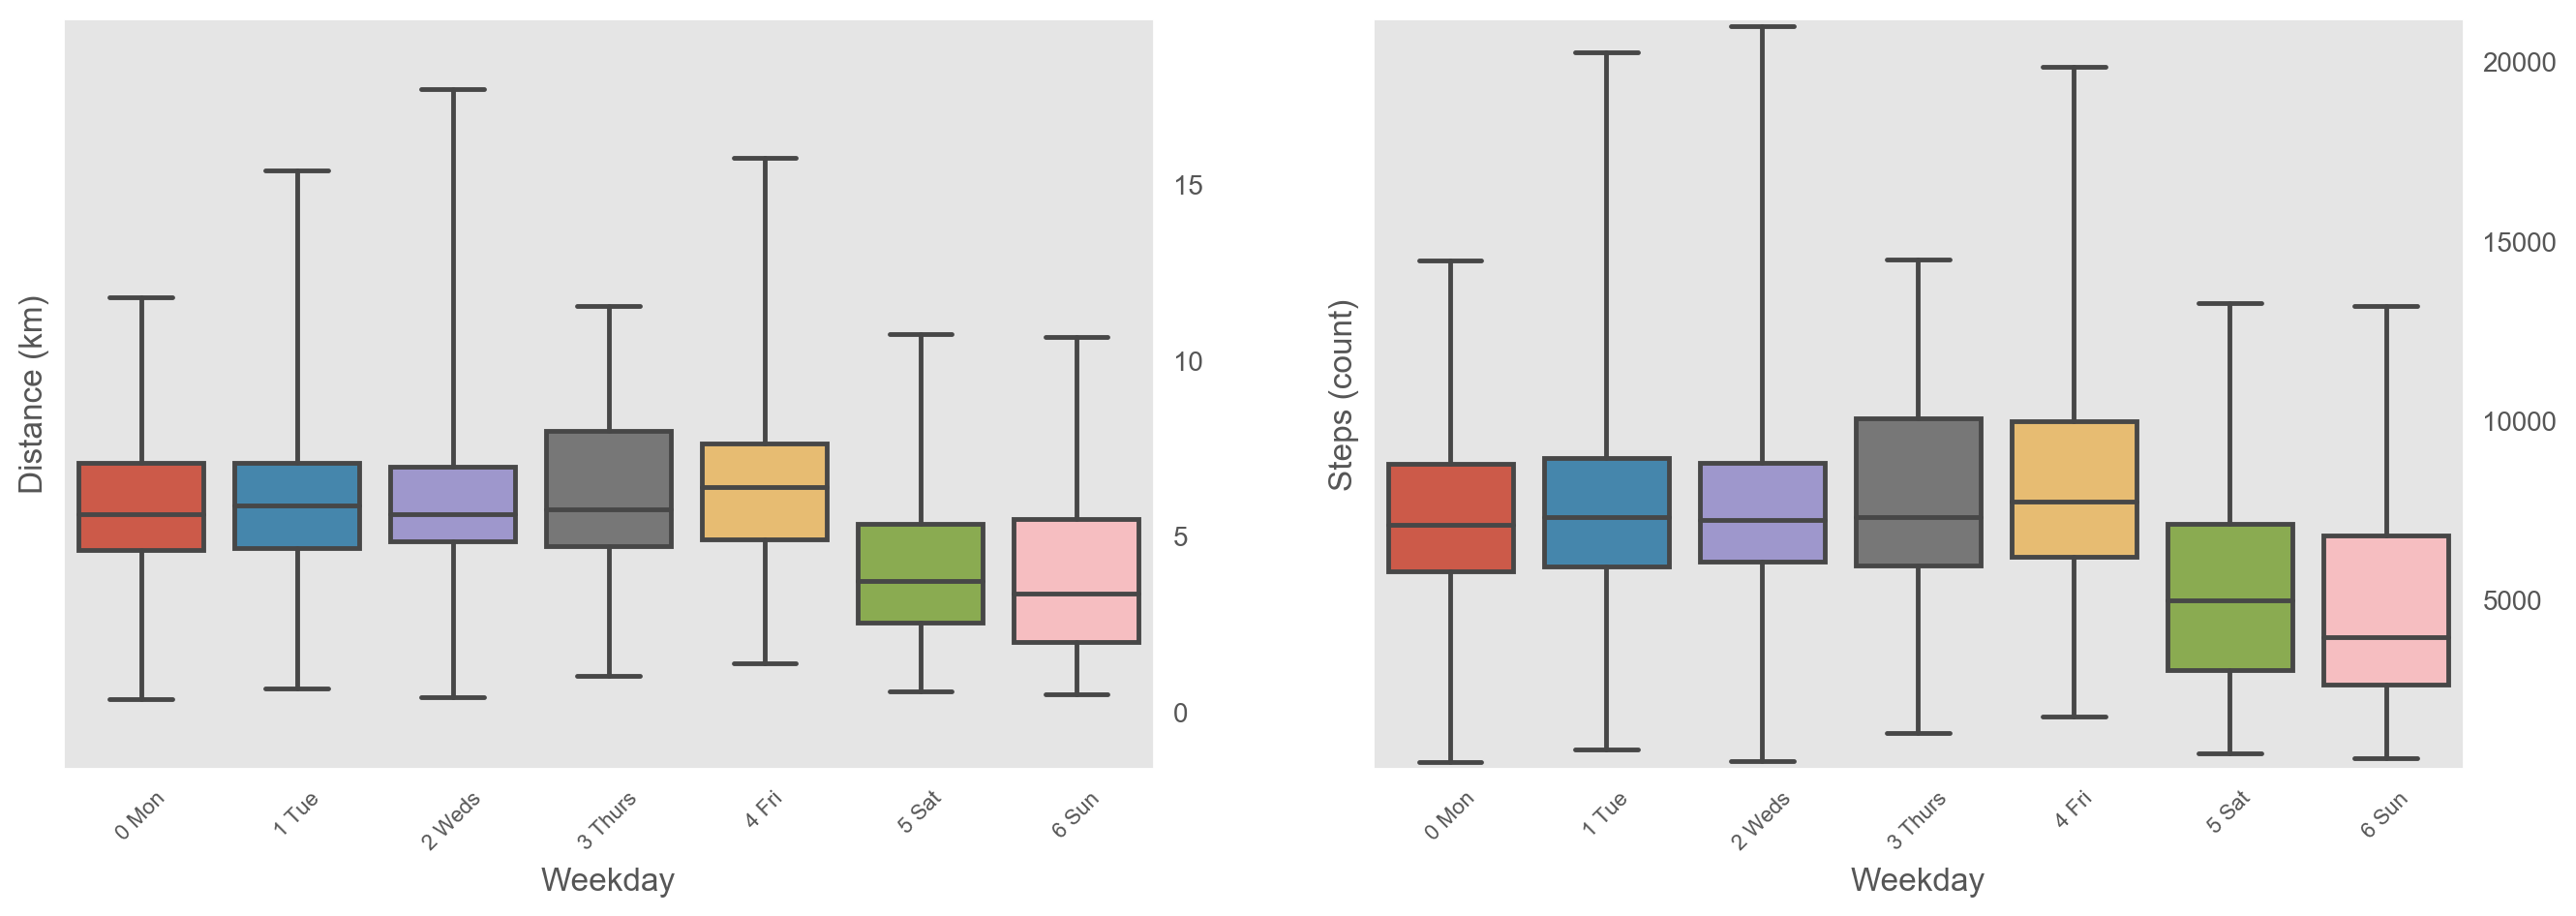

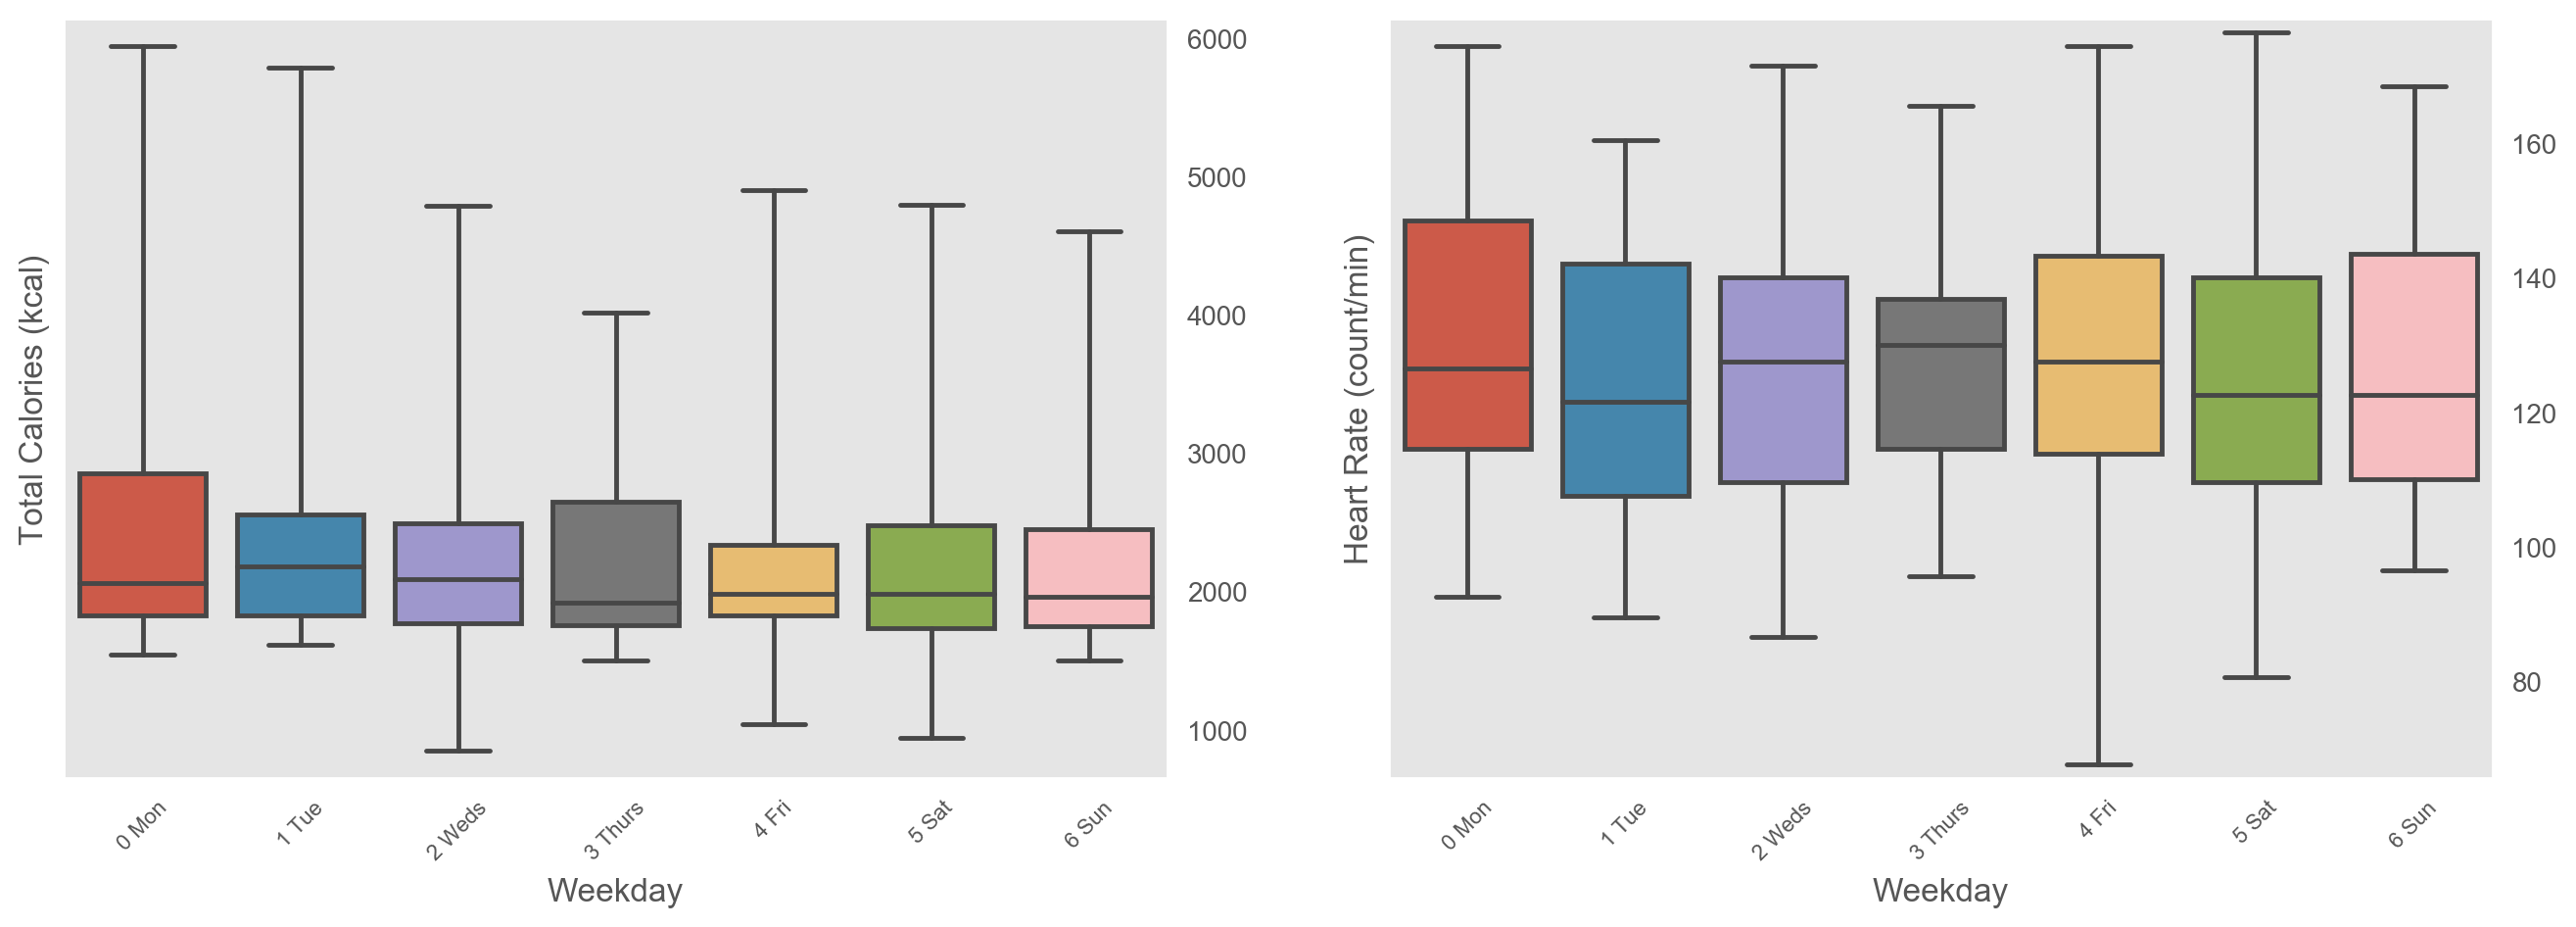

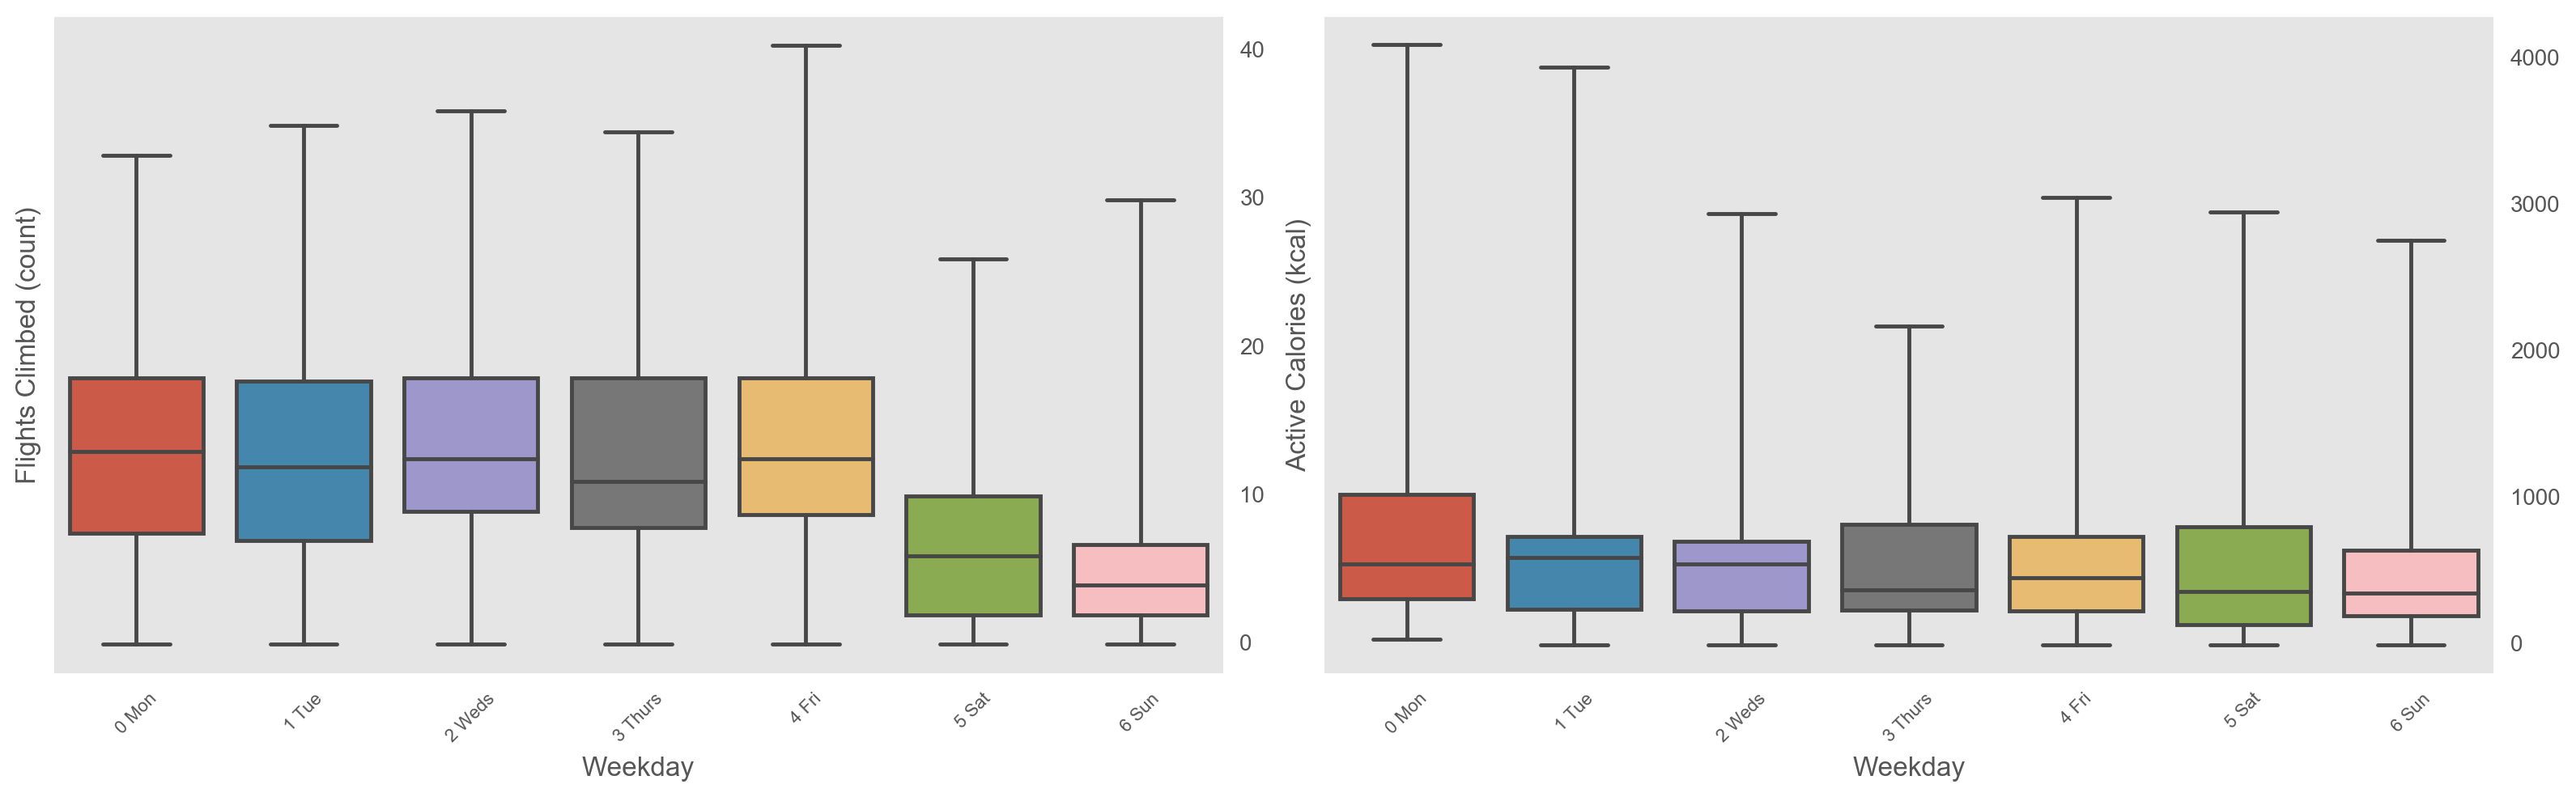

In [28]:
plt.figure(1,figsize=(16,5))
plt.subplot(121)
data_for_steps = data_for_steps.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Distance (km)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Distance (km)"].min()-2,data_for_steps["Distance (km)"].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Steps (count)", data=data_for_steps, whis=[0,100],)
ax5.set_ylim(data_for_steps["Steps (count)"].min()-200,data_for_steps["Steps (count)"].max()+200)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(2,figsize=(16,5))
plt.subplot(121)
data_for_cal = data_for_cal.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Total Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Total Calories (kcal)'].min()-200,data_for_cal['Total Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
data_for_hr = data_for_hr.sort("Weekday")
ax5 = sns.boxplot(x="Weekday", y="Heart Rate (count/min)", data=data_for_hr, whis=[0,100],)
ax5.set_ylim(data_for_hr['Heart Rate (count/min)'].min()-2,data_for_hr['Heart Rate (count/min)'].max()+2)
ax5.set_xticklabels(data_for_hr['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.figure(3,figsize=(16,5))
plt.subplot(121)
ax5 = sns.boxplot(x="Weekday", y="Flights Climbed (count)", data=data_for_steps, whis=[0,100])
ax5.set_ylim(data_for_steps['Flights Climbed (count)'].min()-2,data_for_steps['Flights Climbed (count)'].max()+2)
ax5.set_xticklabels(data_for_steps['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.subplot(122)
ax5 = sns.boxplot(x="Weekday", y="Active Calories (kcal)", data=data_for_cal, whis=[0,100],)
ax5.set_ylim(data_for_cal['Active Calories (kcal)'].min()-200,data_for_cal['Active Calories (kcal)'].max()+200)
ax5.set_xticklabels(data_for_cal['Weekday'].unique())
ax5.grid(b=False)
ax5.yaxis.tick_right()
labels = ax5.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

In [29]:
#hourly steps by weekday & hourly steps by weekend
steps_intraday = steps_intraday.sort("Hour")
steps_intraday.head()

Start             Finish  Steps (count)        Date  \
Start                                                                         
2016-09-24  24-Sep-2016 00:00  24-Sep-2016 01:00          121.0  2016-09-24   
2015-12-13  13-Dec-2015 00:00  13-Dec-2015 01:00           24.0  2015-12-13   
2016-07-03  03-Jul-2016 00:00  03-Jul-2016 01:00           53.0  2016-07-03   
2016-05-15  15-May-2016 00:00  15-May-2016 01:00          134.0  2016-05-15   
2016-05-16  16-May-2016 00:00  16-May-2016 01:00           11.0  2016-05-16   

                Hour Weekday  
Start                         
2016-09-24  00:00:00   5 Sat  
2015-12-13  00:00:00   6 Sun  
2016-07-03  00:00:00   6 Sun  
2016-05-15  00:00:00   6 Sun  
2016-05-16  00:00:00   0 Mon

In [30]:
g = sns.FacetGrid(steps_intraday, row="Weekday", col="Hour", size=3, margin_titles=True)
g.map(plt.hist, "Steps (count)", bins=10, color="blue")

In [31]:
#Average steps per hour per day
steps_avg = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.mean)
steps_avg

Steps (count)                                                      \
Weekday          0 Mon        1 Tue       2 Weds      3 Thurs        4 Fri   
Hour                                                                         
00:00:00     28.000000    45.500000   445.857143    18.000000   144.000000   
01:00:00     20.000000    33.500000    30.666667    71.500000    71.000000   
02:00:00           NaN    12.500000          NaN     7.000000    45.666667   
03:00:00     24.000000          NaN    27.000000     9.000000   859.000000   
04:00:00      9.000000          NaN     8.000000          NaN  1089.000000   
05:00:00     90.493044   142.778036    71.988919    78.000000   815.000000   
06:00:00    386.233397   582.044477   479.002295   321.963859   305.324192   
07:00:00   1603.799143  1630.139984  1496.673935  1597.397308  1557.872759   
08:00:00    247.311583   377.877926   297.809564   439.401710   413.891350   
09:00:00    232.732265   359.108245   514.728121   326.674849   421.325581   
10:00:00    384.946821   478.526929   411.124143   418.471746   603.796859   
11:00:00    351.742895   527.513191   454.711037   531.948044   516.411041   
12:00:00   1021.122846  1025.687675   879.710080   889.297237  1052.335837   
13:00:00    744.197238   879.317146   691.055112   895.961919   742.739001   
14:00:00    271.884251   606.610328   374.765955   514.752068   464.460768   
15:00:00    438.151827   315.691730   500.493449   392.003676   380.752891   
16:00:00    483.878094   302.014643   333.066846   460.236920   277.723918   
17:00:00    396.035896   386.624511   459.617828   408.423809   293.779249   
18:00:00   1231.234323  1366.303553  1326.307381  1281.787304  1144.008069   
19:00:00    506.014224   409.153799   630.886151   608.263517   762.677905   
20:00:00    223.950000   239.911765   434.308755   455.194843   488.896405   
21:00:00    291.434101   123.187500   271.291029   328.363636   354.235715   
22:00:00    129.171659   200.652174   154.500000   247.000000   305.931034   
23:00:00     35.705882   147.565217    98.000000    48.250000   284.761905   

                                    
Weekday         5 Sat        6 Sun  
Hour                                
00:00:00   208.866667   607.684211  
01:00:00   288.224925   303.111111  
02:00:00   699.083439   528.000000  
03:00:00   306.354247    42.000000  
04:00:00   941.000000    31.000000  
05:00:00   190.000000    46.000000  
06:00:00   377.440453   123.000000  
07:00:00  1479.319741  1045.000000  
08:00:00   186.500000   355.750000  
09:00:00   351.000000   111.166667  
10:00:00   272.227273   263.545455  
11:00:00   419.249119   425.720000  
12:00:00   857.794551   935.977612  
13:00:00   620.432268   656.541881  
14:00:00   750.566797   610.430406  
15:00:00   496.148335   503.247173  
16:00:00   683.699760   541.435405  
17:00:00   495.819743   651.697177  
18:00:00   539.632265   804.703503  
19:00:00   663.144049   249.661081  
20:00:00   576.791931   285.122171  
21:00:00   465.004034   222.971449  
22:00:00   217.097086   201.655523  
23:00:00   373.740741   186.714286

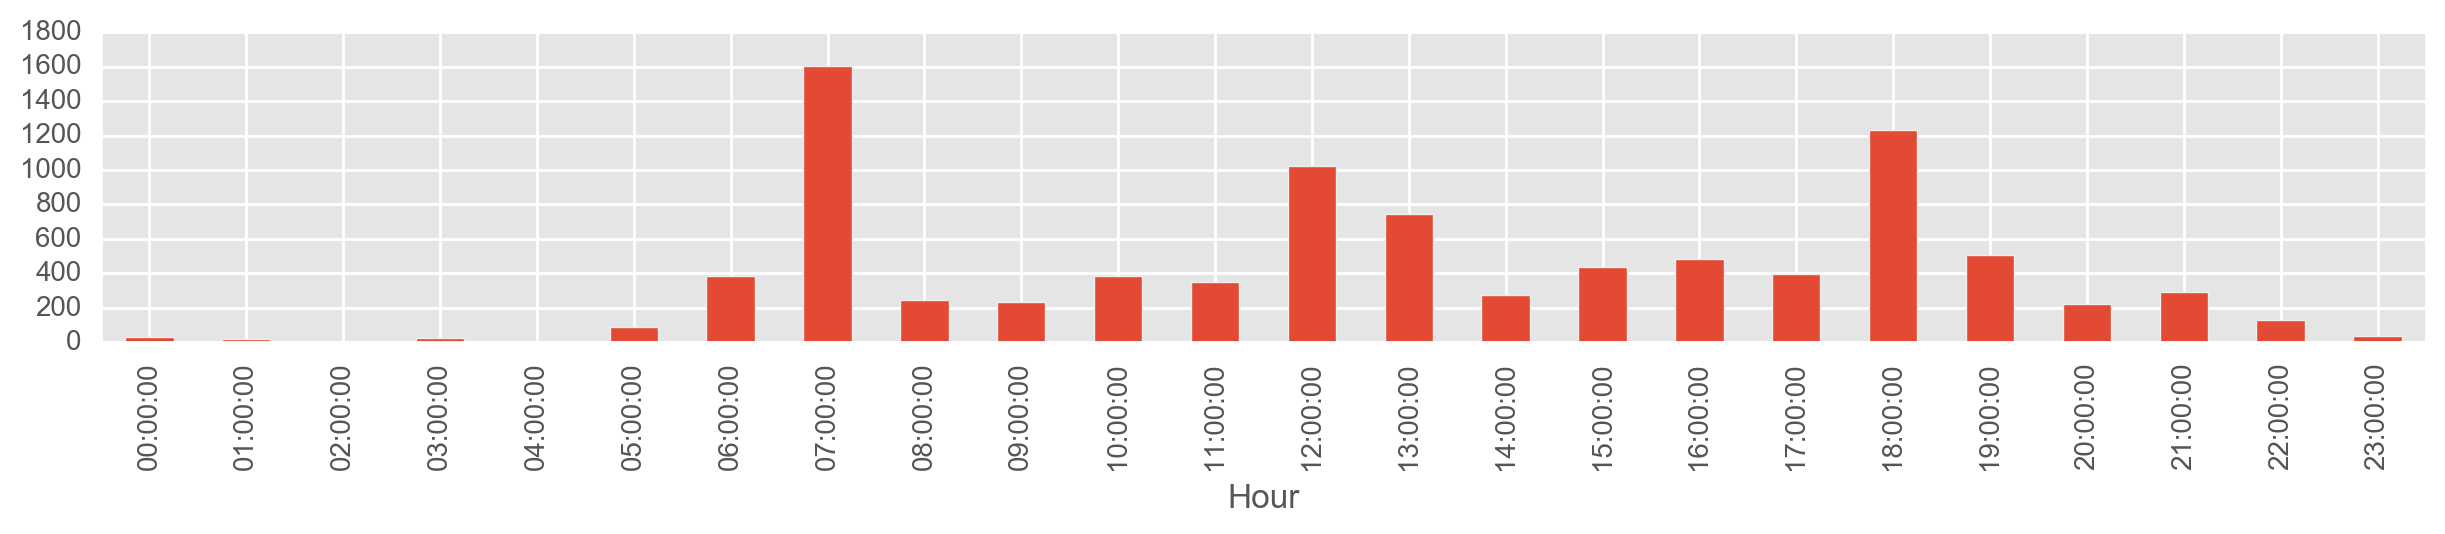

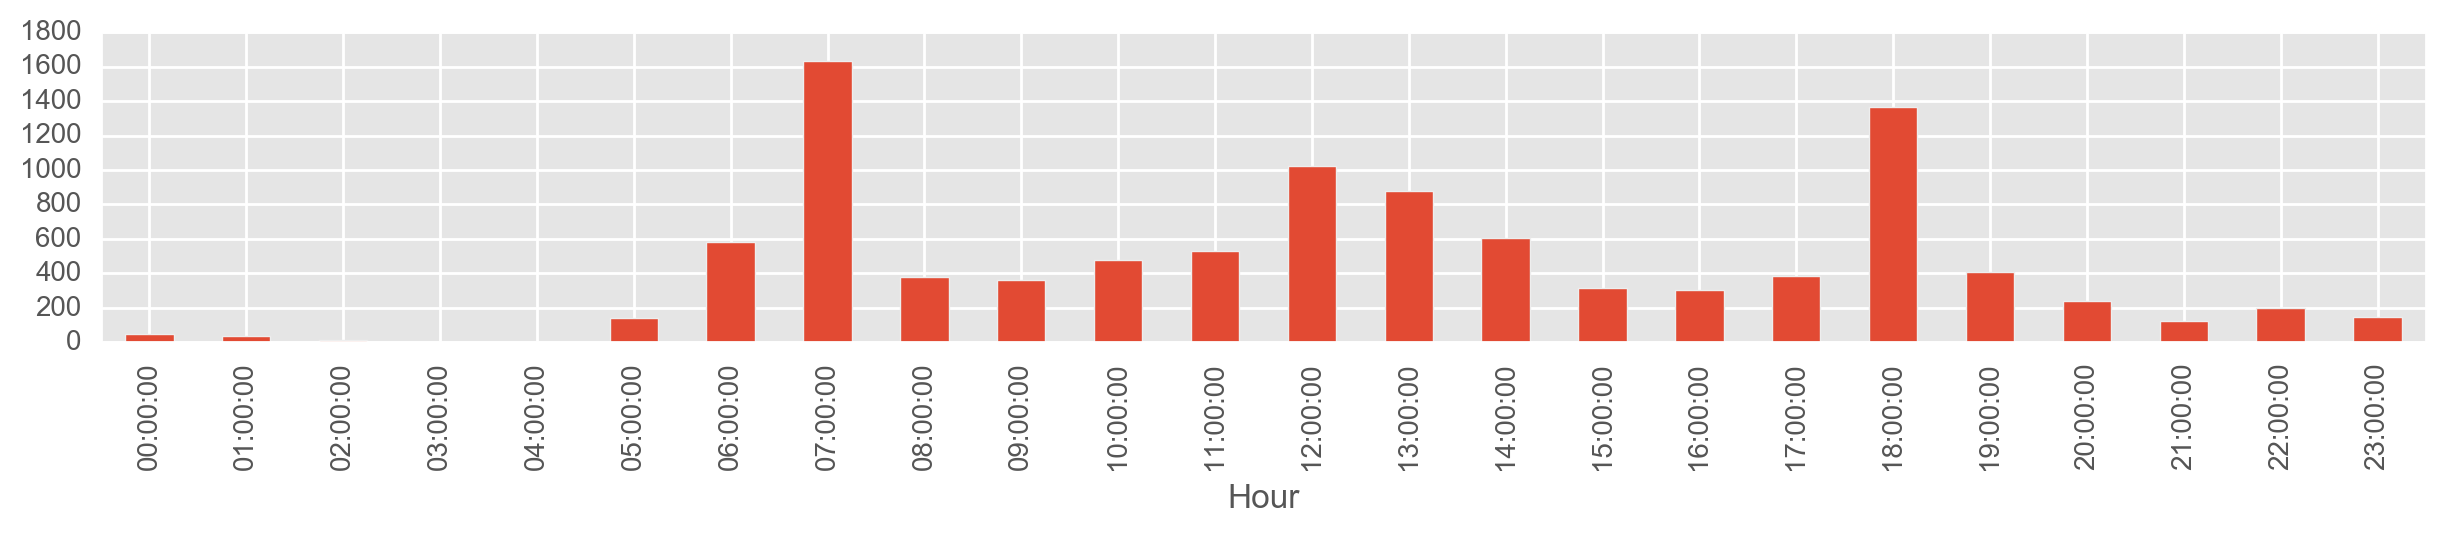

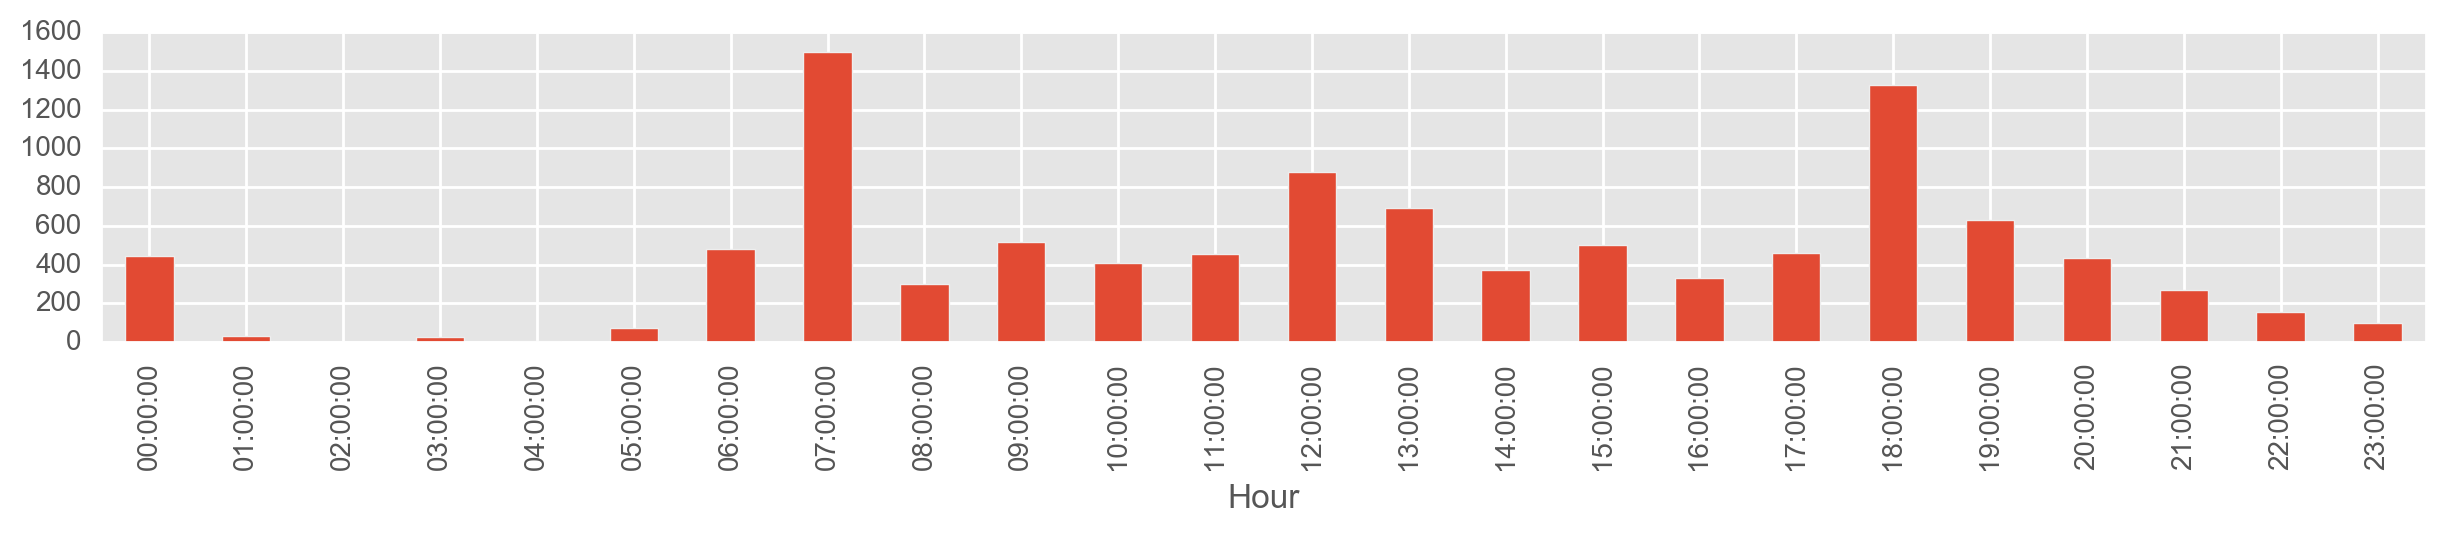

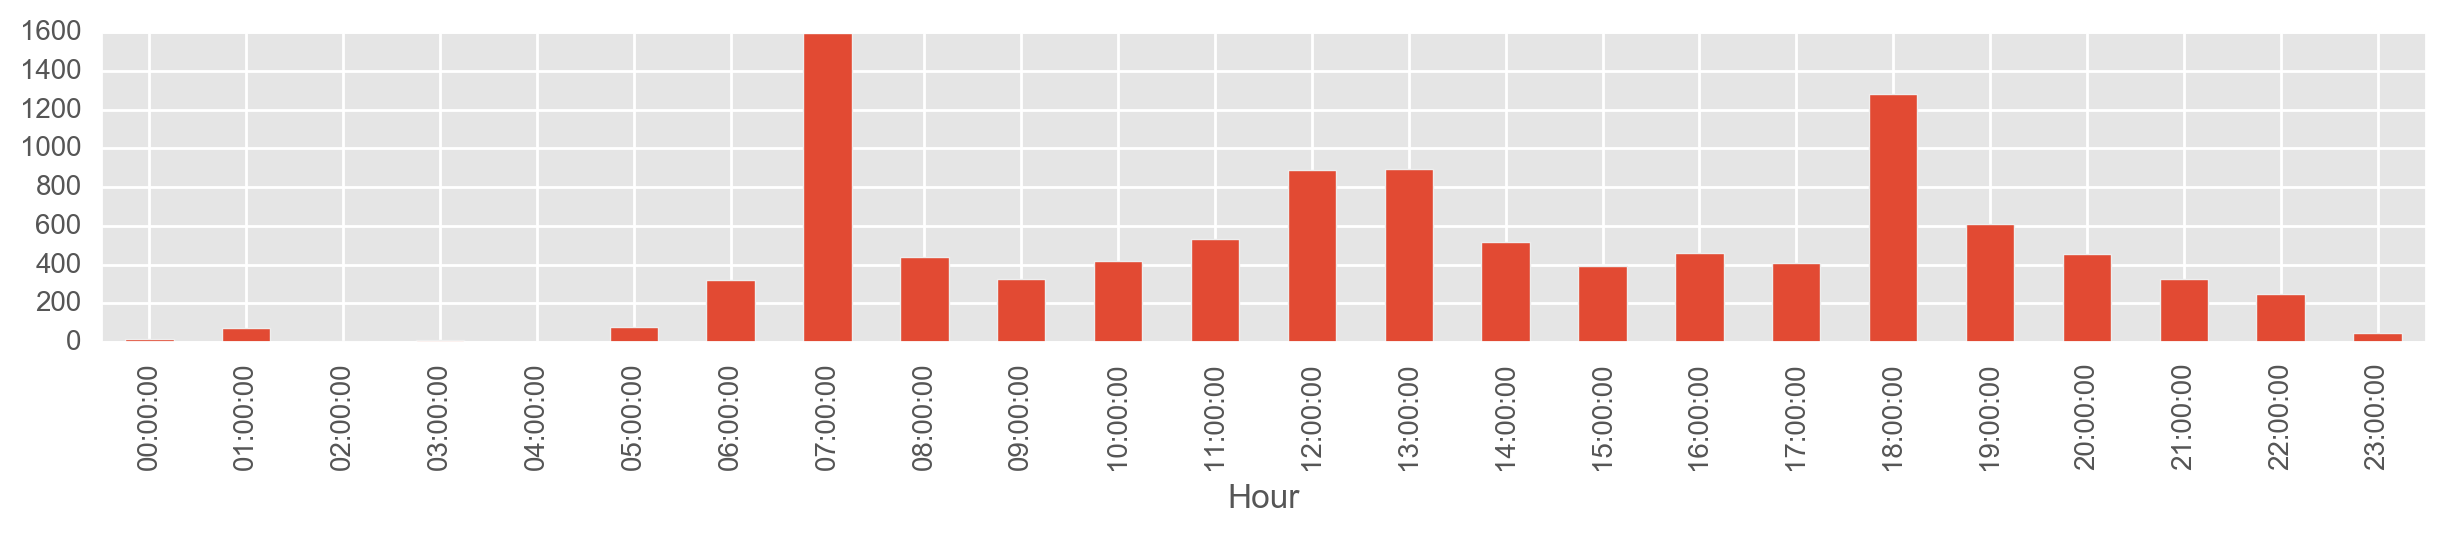

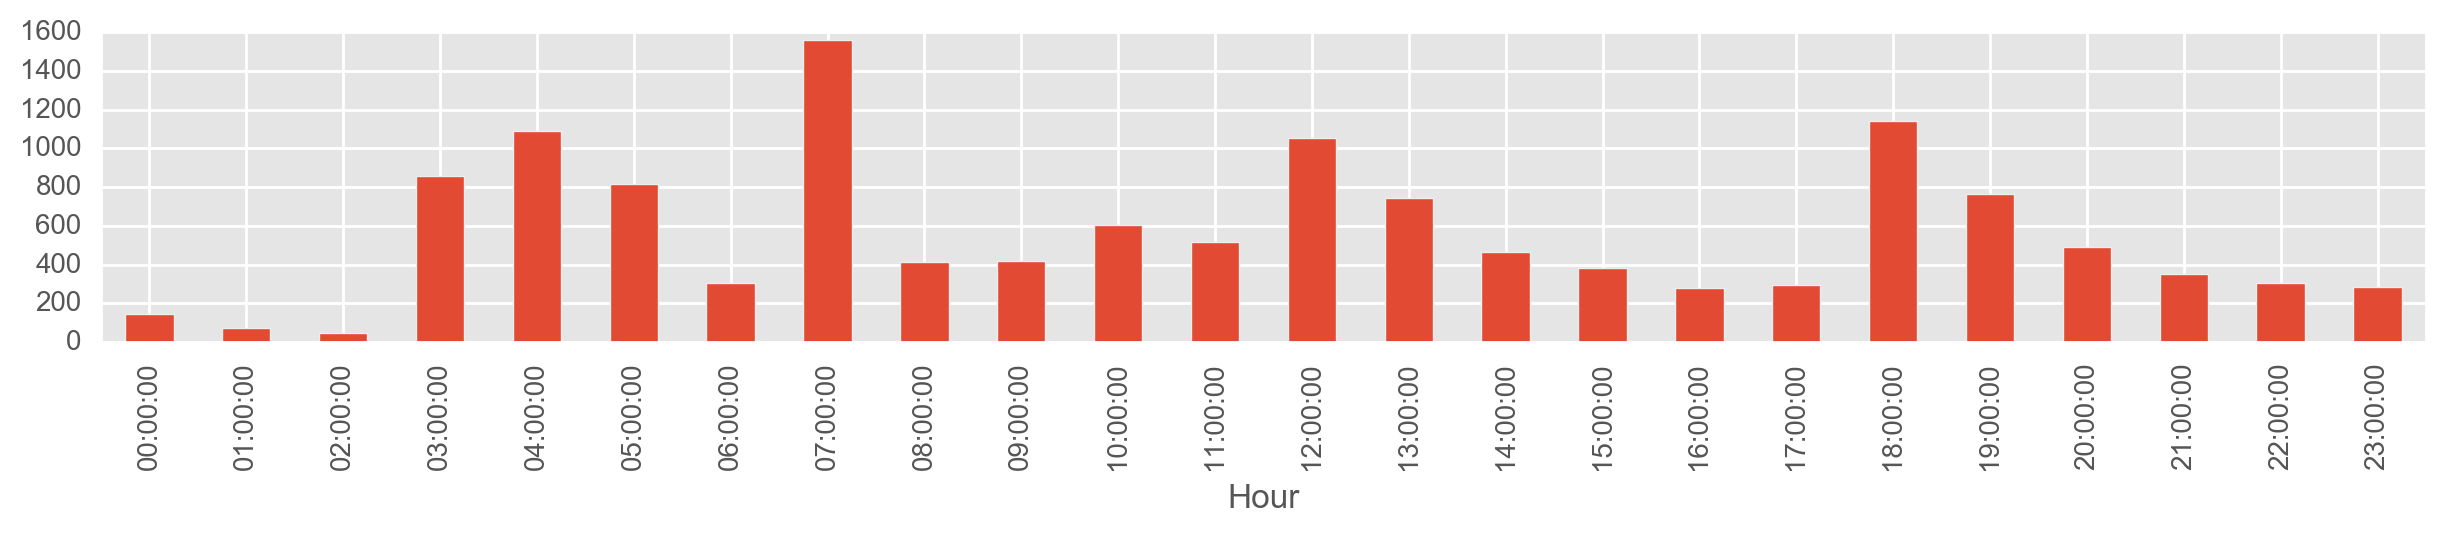

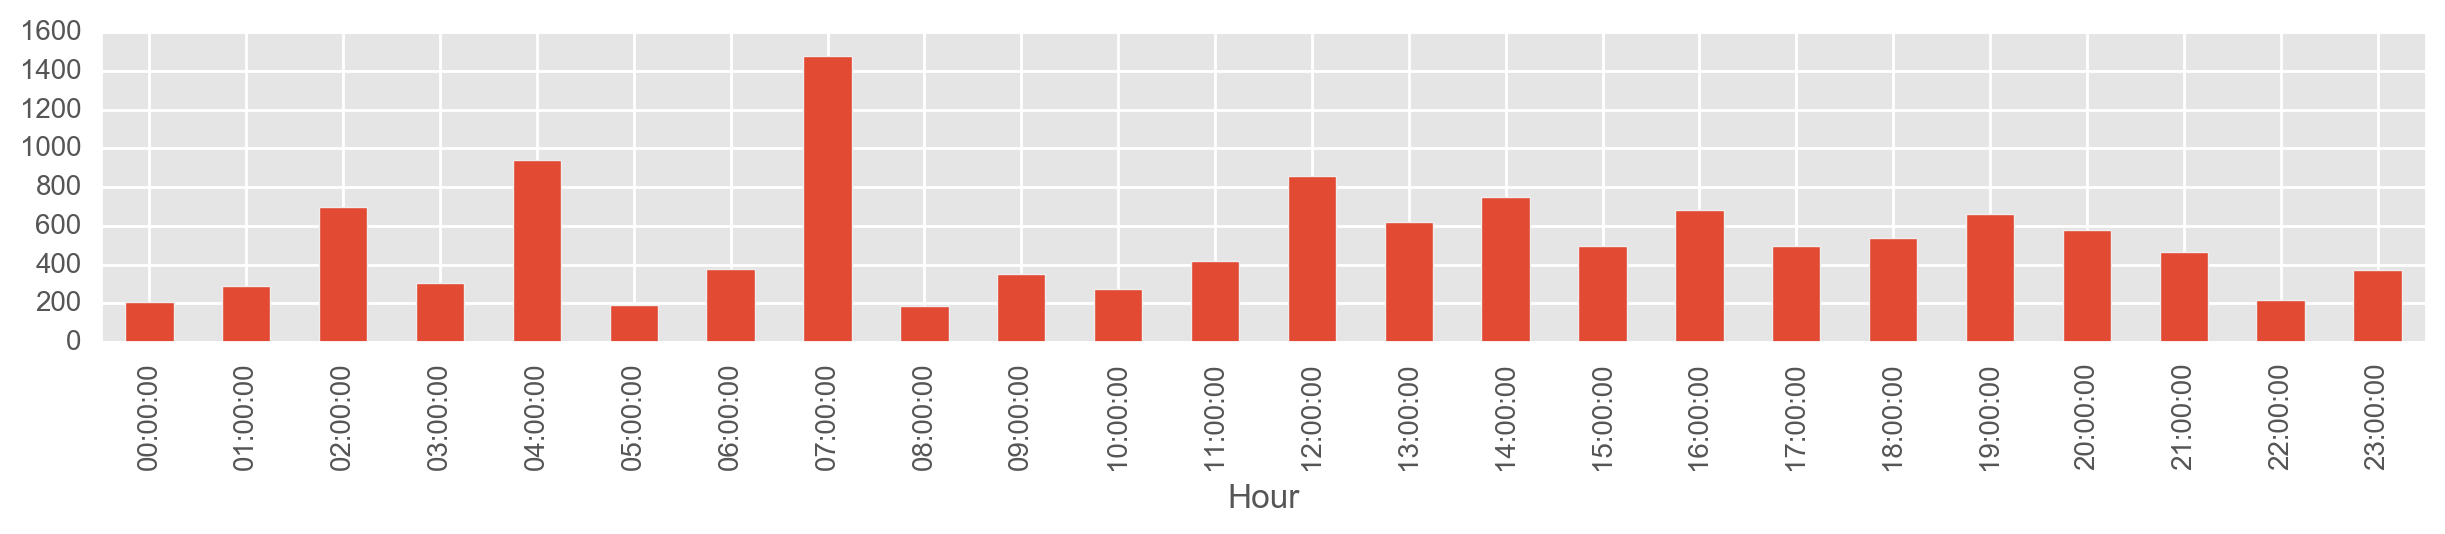

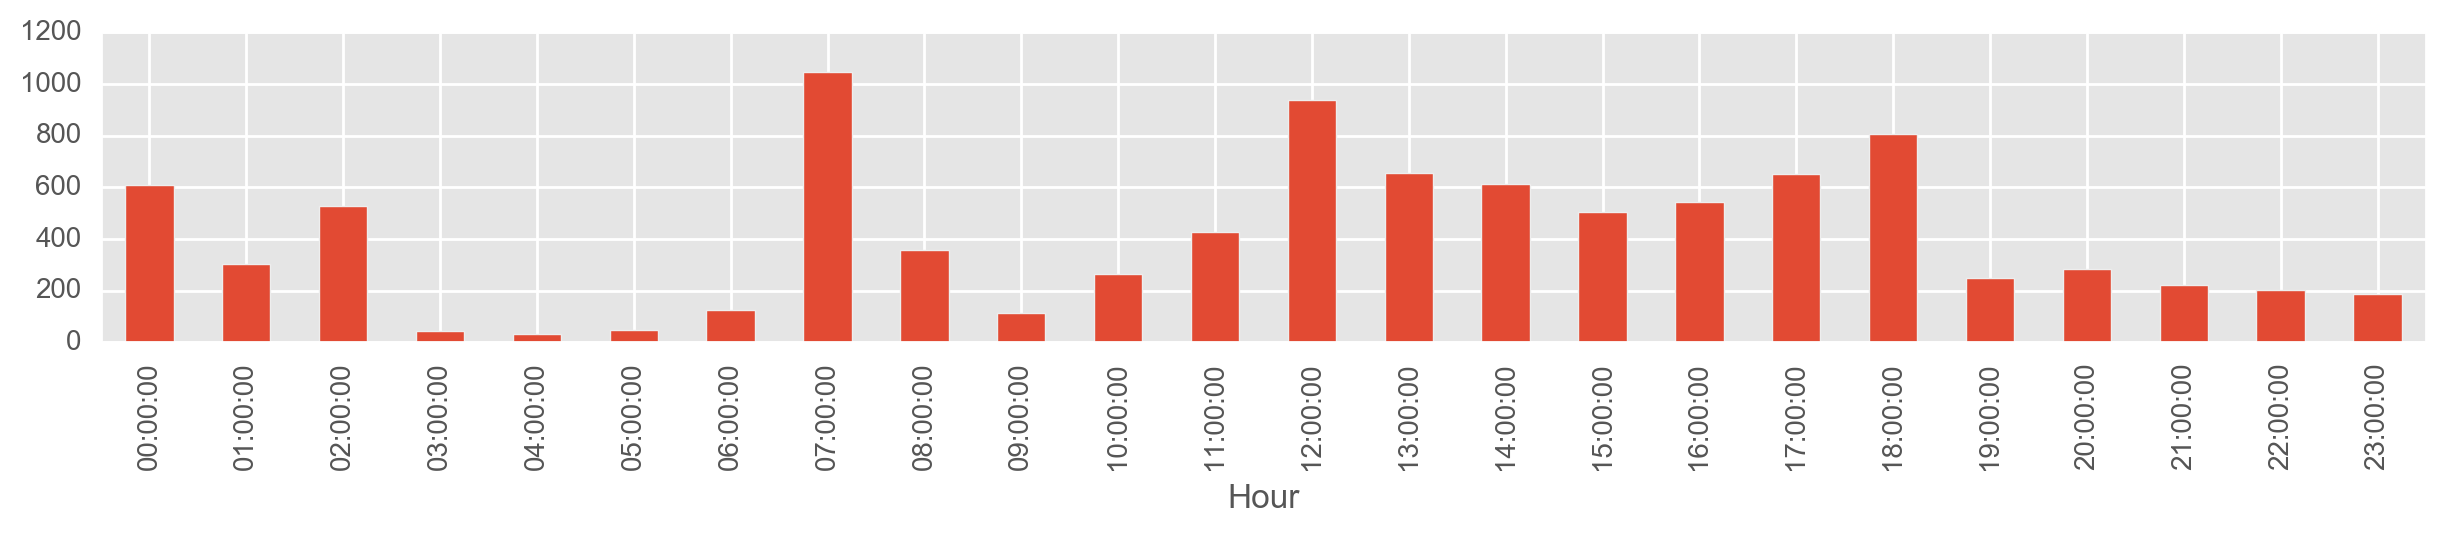

In [32]:
a = steps_avg.transpose()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["0 Mon"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["1 Tue"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["2 Weds"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["3 Thurs"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["4 Fri"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["5 Sat"].plot.bar()
plt.figure(figsize=(15,2))
a.ix["Steps (count)"].ix["6 Sun"].plot.bar()

In [33]:
#Total steps done per hour since 25 Sept 2015
steps_sum = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.sum)
steps1 = steps_sum.round(2)
steps1

Steps (count)                                                    \
Weekday          0 Mon     1 Tue    2 Weds   3 Thurs     4 Fri     5 Sat   
Hour                                                                       
00:00:00        168.00    182.00   3121.00    144.00    288.00   3133.00   
01:00:00         20.00     67.00     92.00    143.00     71.00   1441.12   
02:00:00           NaN     25.00       NaN      7.00    137.00   1398.17   
03:00:00         24.00       NaN     54.00      9.00   1718.00    612.71   
04:00:00          9.00       NaN     16.00       NaN   1089.00    941.00   
05:00:00        271.48    428.33    143.98    234.00    815.00    190.00   
06:00:00       9269.60  13969.07  12933.06   8693.02   7022.46   1509.76   
07:00:00      76982.36  83137.14  77827.04  75077.67  71662.15  10355.24   
08:00:00       8408.59  13225.73   9827.72  11863.85  10347.28    746.00   
09:00:00       8611.09  15800.76  17500.76  11106.94  16010.37   3861.00   
10:00:00      15397.87  22490.77  16444.97  14646.51  23548.08   5989.00   
11:00:00      15124.94  23210.58  20007.29  19682.08  20656.44  12158.22   
12:00:00      54119.51  50258.70  47504.34  40018.38  46302.78  30022.81   
13:00:00      32744.68  39569.27  35243.81  38526.36  34908.73  21715.13   
14:00:00      11691.02  27904.08  16114.94  21619.59  19507.35  24018.14   
15:00:00      19716.83  11996.29  23523.19  19208.18  16372.37  19349.79   
16:00:00      21290.64  12986.63  14654.94  20710.66  11108.96  23245.79   
17:00:00      21385.94  18171.35  22061.66  18787.50  13220.07  14378.77   
18:00:00      72642.83  73780.39  70294.29  69216.51  56056.40  19426.76   
19:00:00      21758.61  18411.92  29651.65  27980.12  32795.15  24536.33   
20:00:00       8958.00   8157.00  17372.35  15476.62  18089.17  19610.93   
21:00:00      10200.19   3942.00   8410.02  10836.00  12398.25  14880.13   
22:00:00       3616.81   4615.00   4017.00   4446.00   8872.00   7164.20   
23:00:00        607.00   3394.00   1764.00    772.00   5980.00  10091.00   

                    
Weekday      6 Sun  
Hour                
00:00:00  11546.00  
01:00:00   2728.00  
02:00:00    528.00  
03:00:00    126.00  
04:00:00     31.00  
05:00:00     46.00  
06:00:00    246.00  
07:00:00   4180.00  
08:00:00   1423.00  
09:00:00   1334.00  
10:00:00   5798.00  
11:00:00  10643.00  
12:00:00  29015.31  
13:00:00  22322.42  
14:00:00  20754.63  
15:00:00  18116.90  
16:00:00  19491.67  
17:00:00  22157.70  
18:00:00  25750.51  
19:00:00   8238.82  
20:00:00   9409.03  
21:00:00   6243.20  
22:00:00   3629.80  
23:00:00   3921.00

In [34]:
#Total steps done per hour since 25 Sept 2015
steps_sum = pd.pivot_table(steps_intraday, index=["Hour"], columns = ['Weekday'], aggfunc=np.sum)
steps1 = steps_sum
steps1

Steps (count)                                            \
Weekday          0 Mon         1 Tue        2 Weds       3 Thurs   
Hour                                                               
00:00:00    168.000000    182.000000   3121.000000    144.000000   
01:00:00     20.000000     67.000000     92.000000    143.000000   
02:00:00           NaN     25.000000           NaN      7.000000   
03:00:00     24.000000           NaN     54.000000      9.000000   
04:00:00      9.000000           NaN     16.000000           NaN   
05:00:00    271.479133    428.334108    143.977839    234.000000   
06:00:00   9269.601533  13969.067453  12933.061961   8693.024198   
07:00:00  76982.358874  83137.139203  77827.044635  75077.673479   
08:00:00   8408.593823  13225.727411   9827.715604  11863.846158   
09:00:00   8611.093789  15800.762786  17500.756122  11106.944881   
10:00:00  15397.872848  22490.765647  16444.965731  14646.511099   
11:00:00  15124.944505  23210.580387  20007.285613  19682.077615   
12:00:00  54119.510831  50258.696086  47504.344326  40018.375659   
13:00:00  32744.678466  39569.271586  35243.810688  38526.362496   
14:00:00  11691.022800  27904.075095  16114.936044  21619.586857   
15:00:00  19716.832198  11996.285728  23523.192084  19208.180108   
16:00:00  21290.636118  12986.629663  14654.941235  20710.661404   
17:00:00  21385.938373  18171.352035  22061.655765  18787.495192   
18:00:00  72642.825075  73780.391842  70294.291211  69216.514400   
19:00:00  21758.611633  18411.920970  29651.649078  27980.121784   
20:00:00   8958.000000   8157.000000  17372.350181  15476.624670   
21:00:00  10200.193543   3942.000000   8410.021886  10836.000000   
22:00:00   3616.806457   4615.000000   4017.000000   4446.000000   
23:00:00    607.000000   3394.000000   1764.000000    772.000000   

                                                    
Weekday          4 Fri         5 Sat         6 Sun  
Hour                                                
00:00:00    288.000000   3133.000000  11546.000000  
01:00:00     71.000000   1441.124627   2728.000000  
02:00:00    137.000000   1398.166878    528.000000  
03:00:00   1718.000000    612.708494    126.000000  
04:00:00   1089.000000    941.000000     31.000000  
05:00:00    815.000000    190.000000     46.000000  
06:00:00   7022.456412   1509.761812    246.000000  
07:00:00  71662.146913  10355.238188   4180.000000  
08:00:00  10347.283744    746.000000   1423.000000  
09:00:00  16010.372088   3861.000000   1334.000000  
10:00:00  23548.077515   5989.000000   5798.000000  
11:00:00  20656.441648  12158.224462  10643.000000  
12:00:00  46302.776809  30022.809286  29015.305975  
13:00:00  34908.733065  21715.129397  22322.423966  
14:00:00  19507.352238  24018.137502  20754.633817  
15:00:00  16372.374309  19349.785046  18116.898212  
16:00:00  11108.956709  23245.791850  19491.674582  
17:00:00  13220.066191  14378.772533  22157.704023  
18:00:00  56056.395404  19426.761531  25750.512105  
19:00:00  32795.149918  24536.329816   8238.815677  
20:00:00  18089.167001  19610.925645   9409.031643  
21:00:00  12398.250036  14880.129089   6243.200580  
22:00:00   8872.000000   7164.203843   3629.799420  
23:00:00   5980.000000  10091.000000   3921.000000

In [35]:
#Average Heart Rate per hour since 11 Mar 2016
hr_avg = pd.pivot_table(hr_intraday2, index=["Hour"], columns = ['Weekday'], aggfunc={np.median,np.mean})
hr_avg = hr_avg.round(2)
hr_avg

Heart Rate (count/min)                                             \
                         median                                              
Weekday                   0 Mon  1 Tue 2 Weds 3 Thurs  4 Fri  5 Sat  6 Sun   
Hour                                                                         
00:00:00                   84.0   74.5   78.5    75.0   80.5   79.0   95.0   
01:00:00                   76.0   63.0   61.0    71.0   71.5   74.0   82.0   
02:00:00                   64.0   64.5   61.0    62.5   73.0   64.0   63.0   
03:00:00                   60.0   58.0   61.0    60.0   69.0   64.0   68.0   
04:00:00                   61.0   61.0   63.5    63.0   62.0   62.0   62.0   
05:00:00                   63.0   65.0   63.0    62.5   67.0   61.5   61.0   
06:00:00                  101.5   99.5   71.0    72.0   86.0   64.0   62.0   
07:00:00                  122.0  120.0  115.0   120.0  120.5   67.0   73.0   
08:00:00                   96.0   94.0   93.5    89.0  100.0   76.0   77.0   
09:00:00                   93.0   96.0   90.5    83.0   93.0   89.5   78.0   
10:00:00                   99.0   95.0   88.0    88.0   97.5   98.0   85.0   
11:00:00                   98.0   94.0   85.0    92.0   93.5  100.5   99.5   
12:00:00                  114.0  110.0  101.5    99.0  105.5  101.0  101.0   
13:00:00                  104.0  106.0  109.0   104.0  108.0   97.5   99.0   
14:00:00                  103.0  105.0  101.5   100.0  106.0  101.0  104.5   
15:00:00                  103.0  101.0   99.5   101.5  107.0  100.0  104.0   
16:00:00                  101.0   99.5   98.0    98.0  107.0  105.5  101.0   
17:00:00                   97.0   98.0   98.5    98.0   97.0  104.0  102.0   
18:00:00                  108.5  104.0  101.0   108.0  100.0   97.0  100.5   
19:00:00                  103.5   97.0  103.0    93.0  100.0   99.5   99.5   
20:00:00                   96.0   91.0   96.5    97.5   95.0   99.0   98.0   
21:00:00                   96.0   91.5   90.5    94.0  100.0   97.5   94.0   
22:00:00                   88.0   90.0   89.5    90.0  100.0   95.0   86.0   
23:00:00                   82.5   81.5   82.0    87.0   92.0   95.0   81.0   

                                                                  
            mean                                                  
Weekday    0 Mon   1 Tue  2 Weds 3 Thurs   4 Fri   5 Sat   6 Sun  
Hour                                                              
00:00:00   86.82   80.50   82.73   81.12   83.39   86.18   94.65  
01:00:00   73.00   63.40   68.44   70.89   72.33   84.75   85.18  
02:00:00   64.33   64.00   69.00   63.60   72.25   75.43   68.43  
03:00:00   60.71   59.20   64.56   63.86   67.40   70.57   67.88  
04:00:00   61.57   60.50   63.00   62.00   63.40   69.00   69.00  
05:00:00   72.00   68.40   74.00   64.12   67.25   70.17   68.75  
06:00:00   96.67   97.75   81.00   76.25   95.20   65.33   69.38  
07:00:00  114.36  113.77  111.83  112.00  115.58   78.89   81.56  
08:00:00   96.19   95.38   94.32   93.63  101.12   77.58   78.33  
09:00:00   94.72   96.67   91.57   89.56   98.64   90.17   79.82  
10:00:00   95.58   97.63   91.16   92.59   96.23   95.39   88.12  
11:00:00   98.61   97.35   88.21   97.13   97.04  104.58   97.83  
12:00:00  108.64  110.00  104.29  100.79  107.23  105.08  105.64  
13:00:00  106.41  106.70  107.33  106.59  105.83  104.69  101.87  
14:00:00  103.83  105.66  105.47  107.96  110.10  104.83  103.80  
15:00:00  104.38   98.88  102.57  103.83  105.56  104.38  105.26  
16:00:00  103.94  103.67  103.06   99.94  106.07  105.08  101.90  
17:00:00  100.20   98.93  102.03  102.00  103.18  103.04  103.62  
18:00:00  114.71  106.18  106.00  112.07  105.96  101.50  103.75  
19:00:00  106.41  100.37  104.21   97.48  110.13  106.69  101.27  
20:00:00  100.82   95.33  100.40   98.92   96.64  106.48  100.34  
21:00:00   98.06   96.96   93.35   96.19  101.83  101.58   95.52  
22:00:00   97.58   91.74   93.08   93.35   99.91   97.96   92.76  
23:00:00   86.1

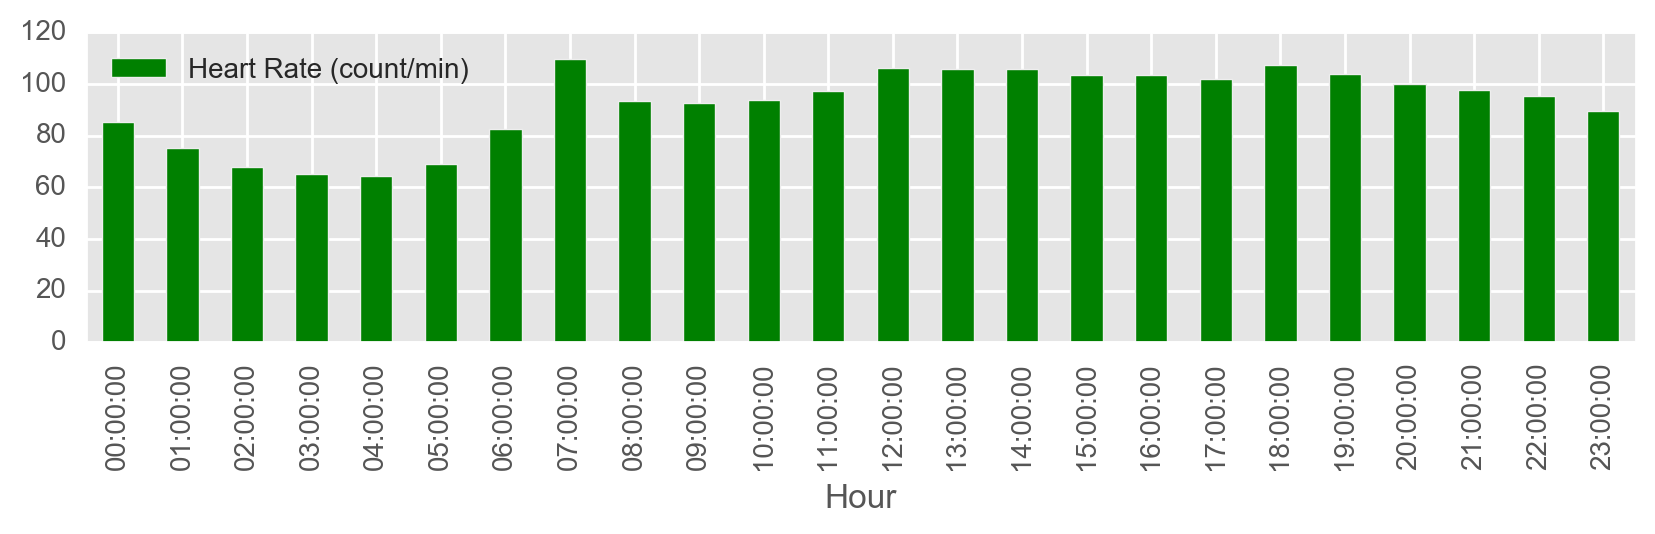

In [36]:
#Average Heart Rate per Hour Chart
a1 = hr_intraday2.groupby("Hour").agg(np.mean)
#plt.fig(figsize=(15,2))
a1.plot.bar(color='g',figsize=(10,2))